In [1]:
import numpy as np
from skimage import measure
from skimage.segmentation import find_boundaries
from skimage.morphology import opening,closing
from skimage.io import imread
from matplotlib import pyplot as plt
import os
from os import listdir
import pandas as pd
from scipy.stats import kde
import seaborn as sns
import copy
from math import exp,log
import pickle
import scipy.ndimage as ndimage
import scipy.interpolate.fitpack as fitpack
from sklearn import manifold,decomposition,random_projection,cluster,metrics,preprocessing,mixture,model_selection
from sklearn.neighbors import kneighbors_graph,BallTree
from hmmlearn import hmm

import scipy.io as sio

from mpl_toolkits.mplot3d import Axes3D
from cell_class import single_cell
import contour_class
import utility_tools
import image_warp
from contour_tool import df_find_contour_points,find_contour_points,generate_contours,align_contour_to,align_contours
from scipy.signal import medfilt
from traj_class import single_cell_traj,fluor_single_cell_traj

In [2]:
main_path='a549_2022/'

output_path=main_path+'output/'
cells_path=main_path+'cells/'
pcna_input_path=main_path+'pcna/'
ict_path=main_path+'intact_cycle_traj/'

posi_start=1
posi_end=1
fluor_interval=6

82
ict_xy1_1084.0
(113, 3)


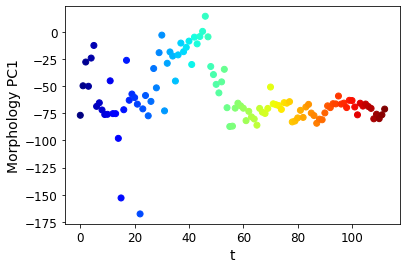

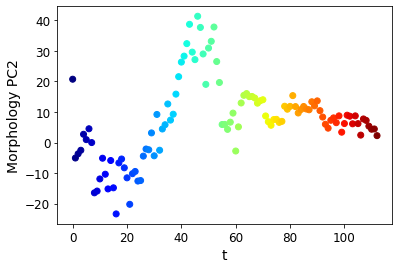

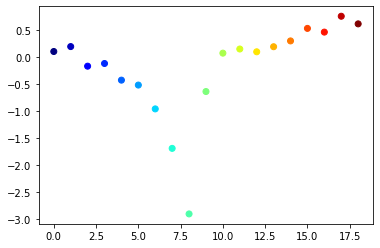

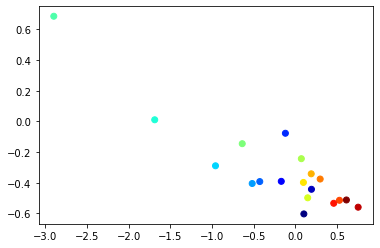

ict_xy1_1097
(200, 3)


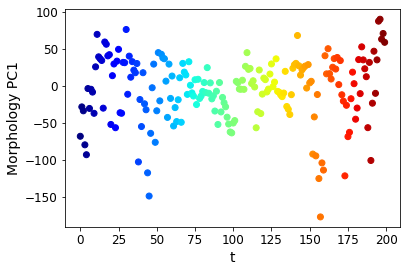

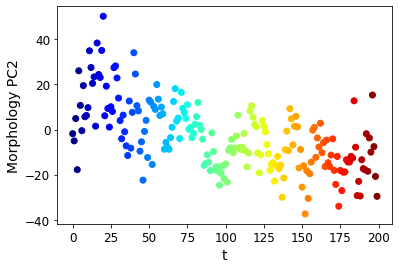

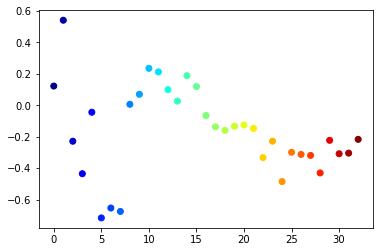

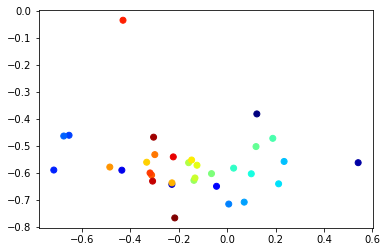

ict_xy1_126.0
(341, 3)


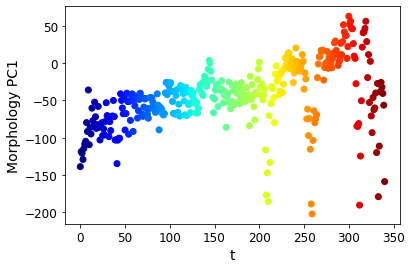

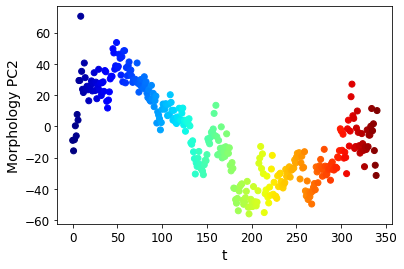

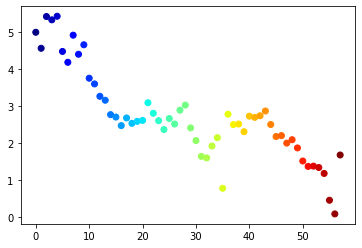

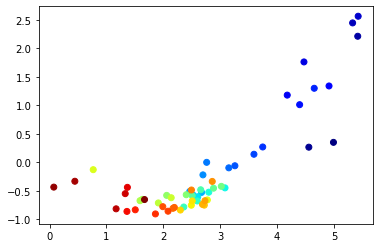

ict_xy1_136.0
(319, 3)


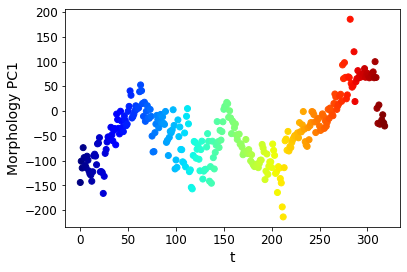

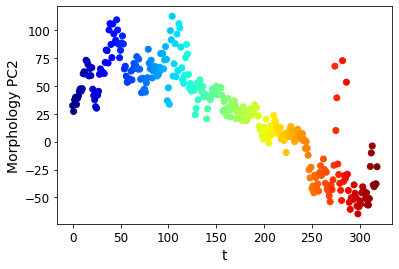

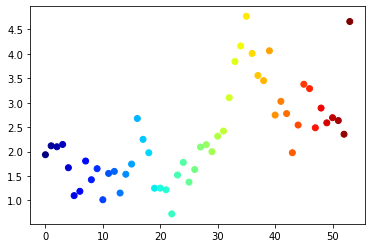

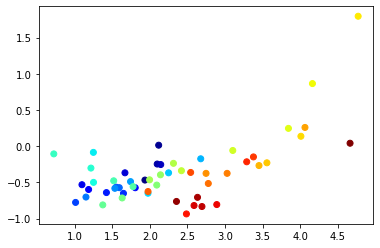

ict_xy1_1431
(120, 3)


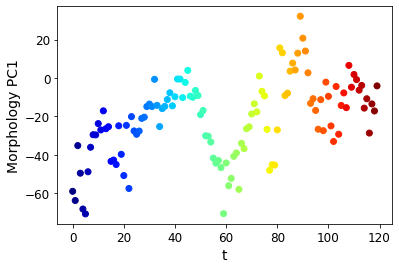

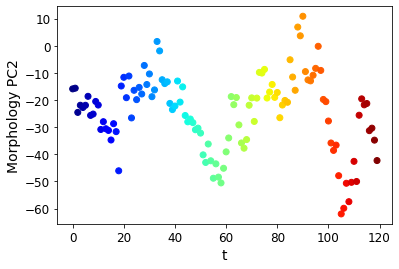

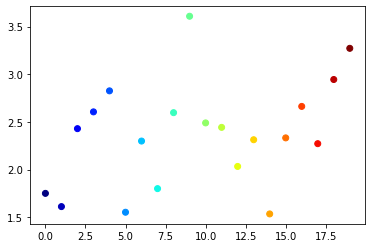

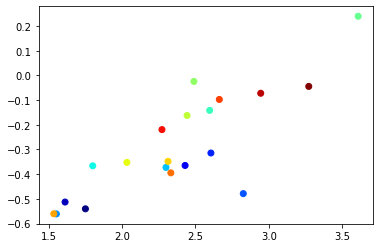

ict_xy1_1431.0
(120, 3)


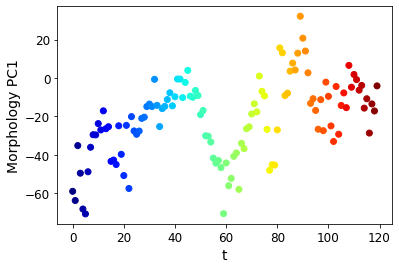

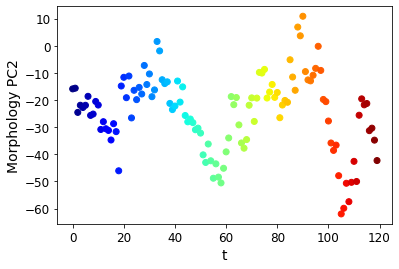

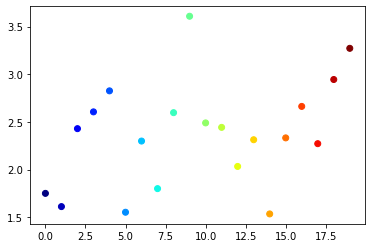

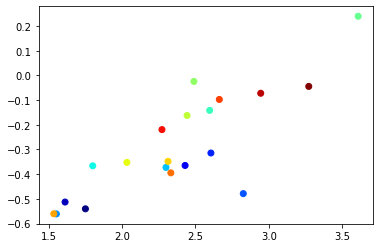

ict_xy1_154.0
(204, 3)


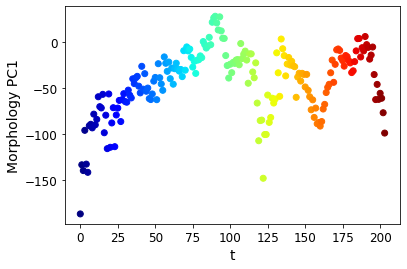

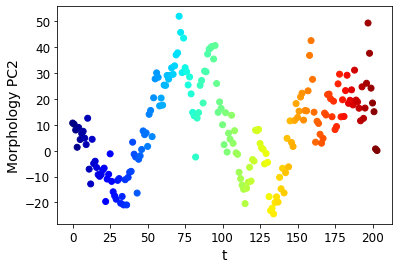

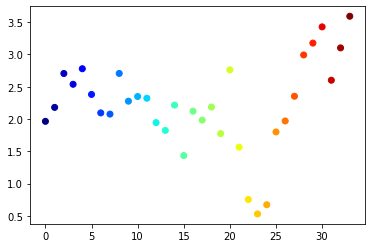

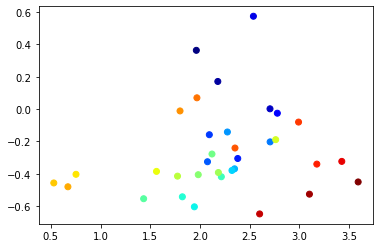

ict_xy1_175.0
(363, 3)


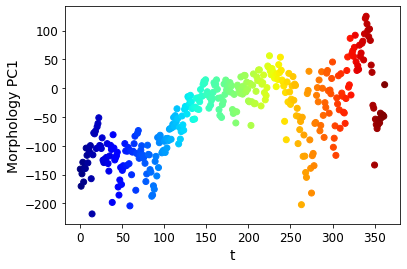

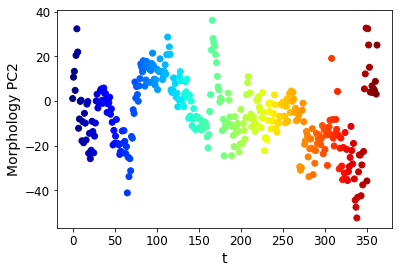

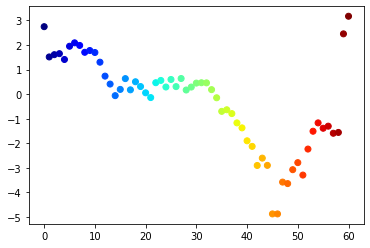

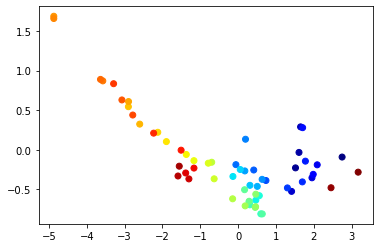

ict_xy1_290.0
(479, 3)


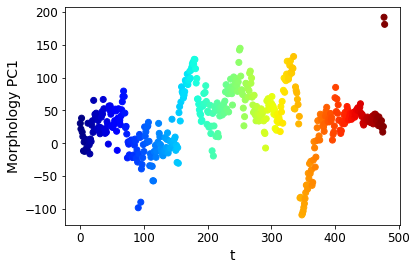

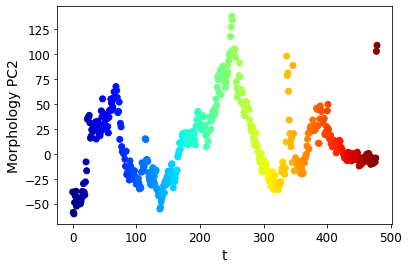

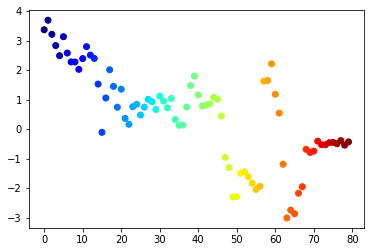

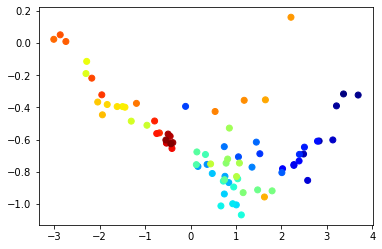

ict_xy1_963.0
(109, 3)


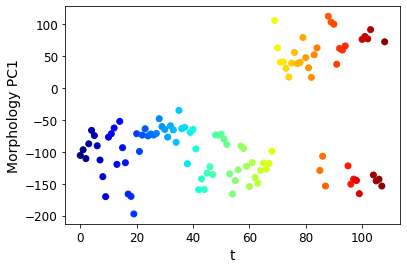

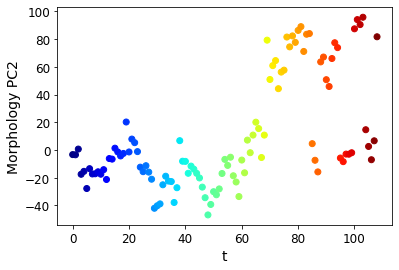

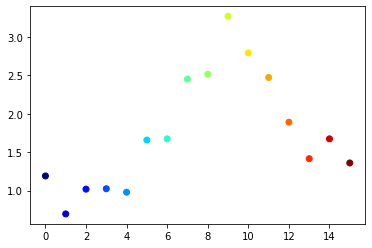

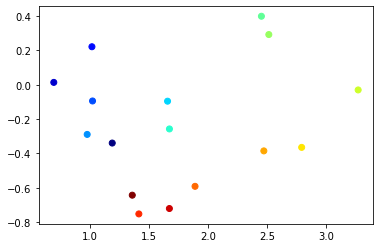

ict_xy1_965.0
(198, 3)


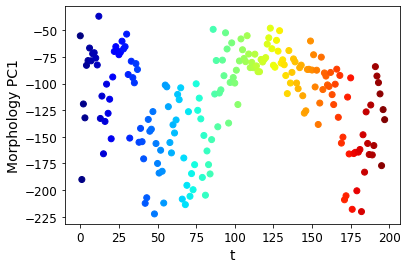

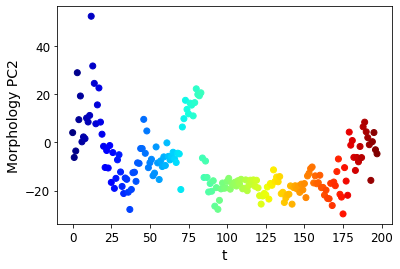

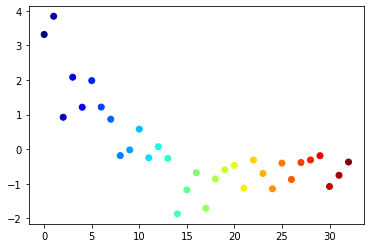

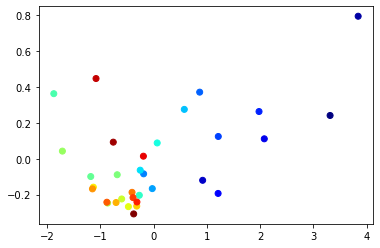

ict_xy1_975.0
(253, 3)


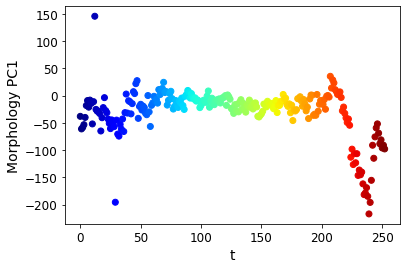

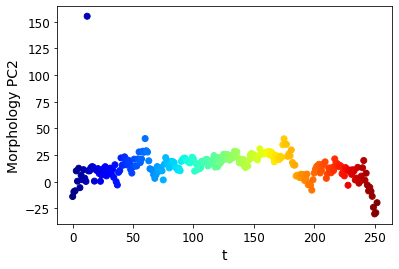

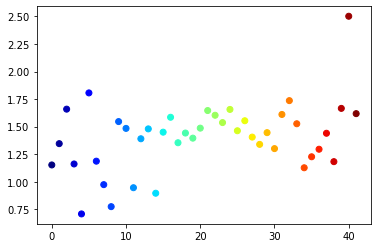

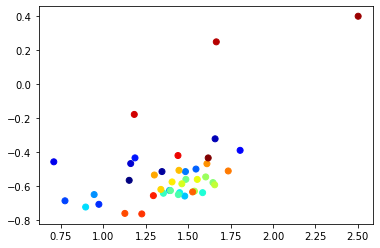

ict_xy1_985.0
(250, 3)


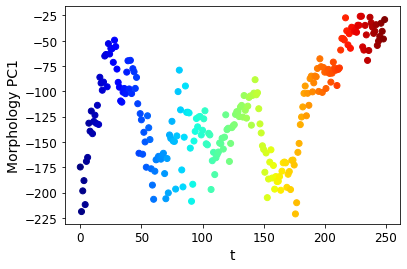

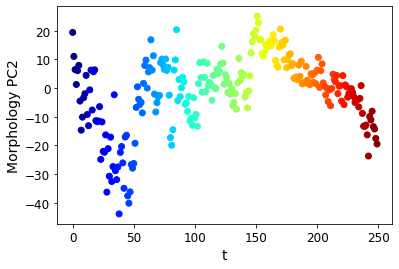

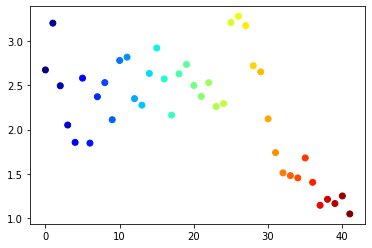

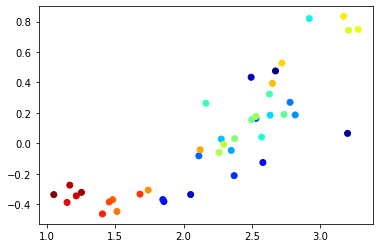

ict_xy1_99.0
(386, 3)


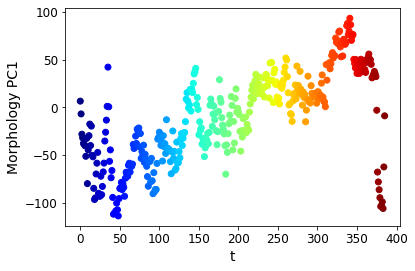

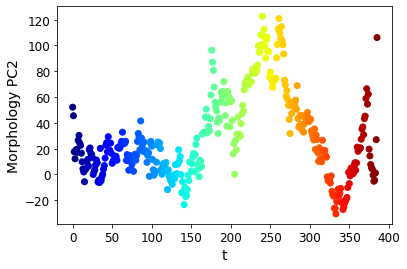

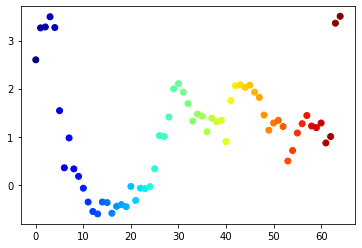

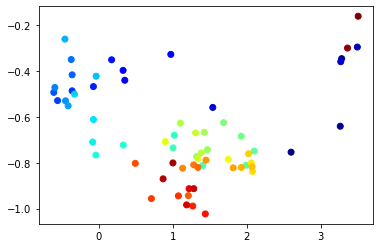

sct_xy1_1007.0
(433, 3)


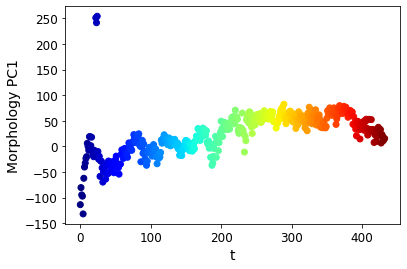

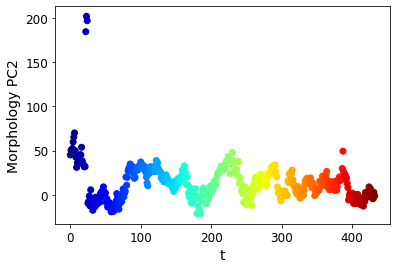

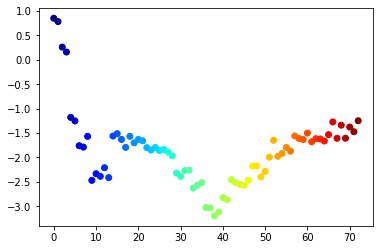

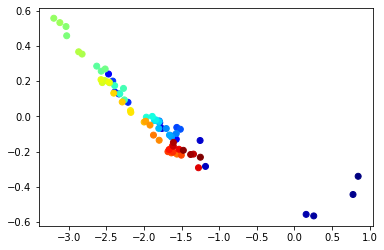

sct_xy1_1011.0
(245, 3)


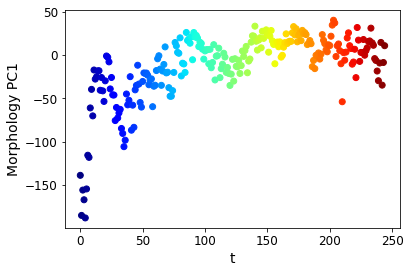

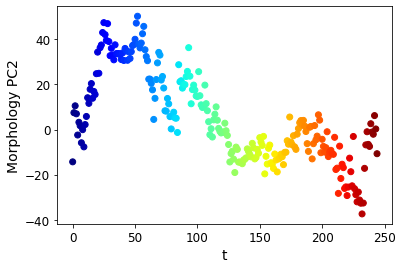

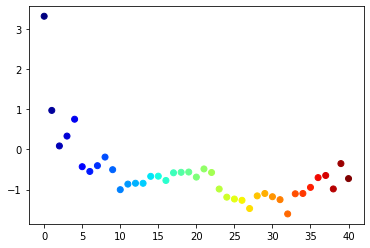

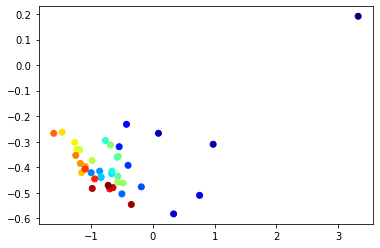

sct_xy1_1014.0
(245, 3)


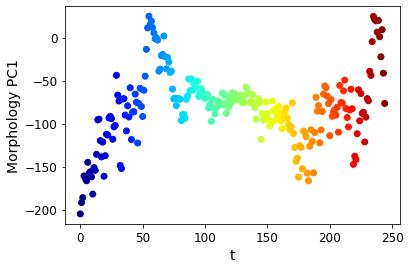

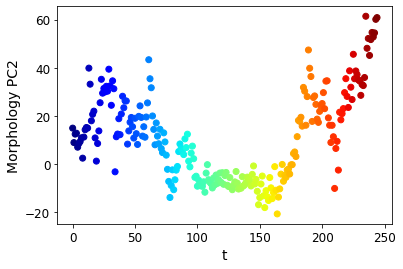

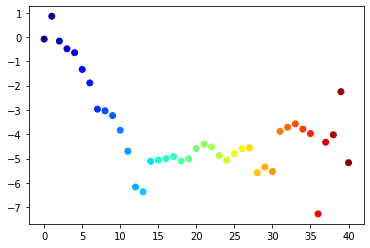

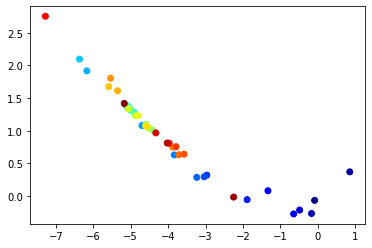

sct_xy1_1016.0
(187, 3)


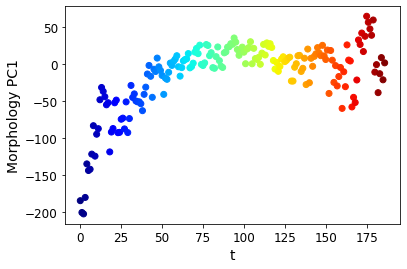

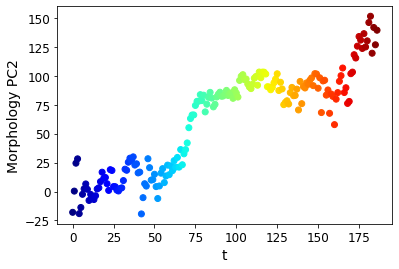

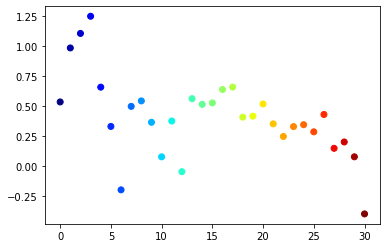

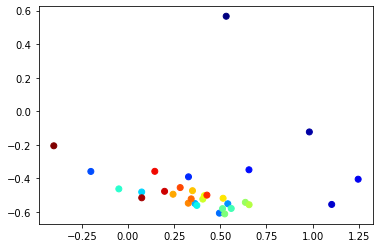

sct_xy1_1024.0
(188, 3)


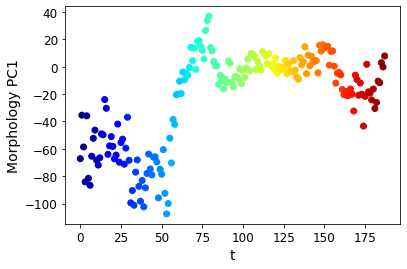

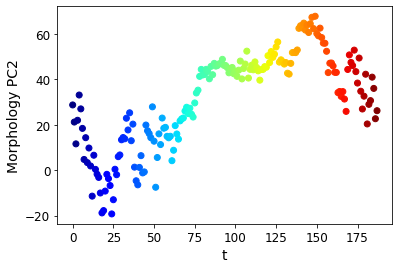

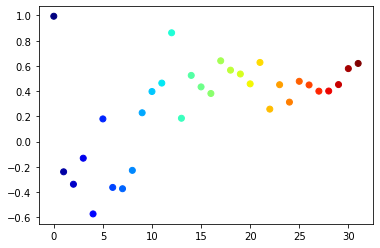

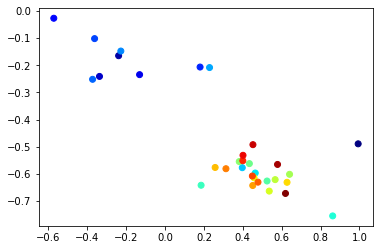

sct_xy1_1025.0
(418, 3)


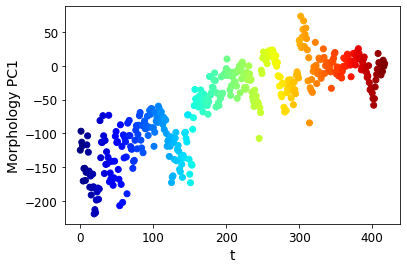

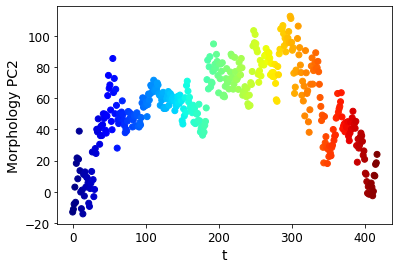

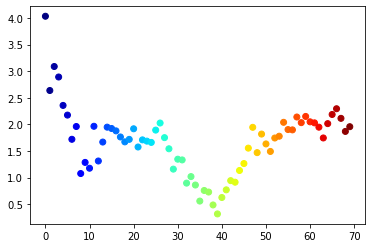

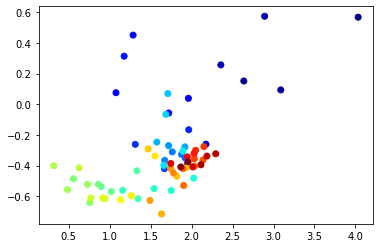

sct_xy1_1050.0
(102, 3)


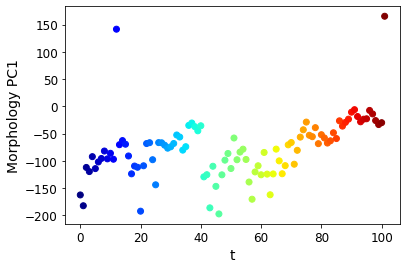

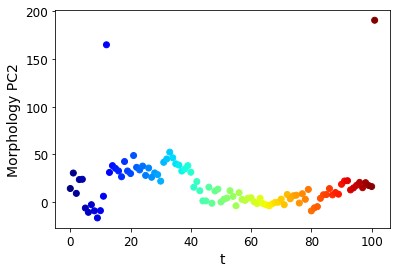

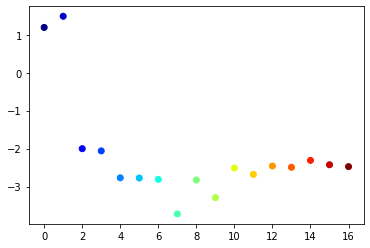

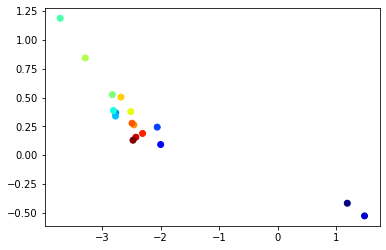

sct_xy1_1068.0
(167, 3)


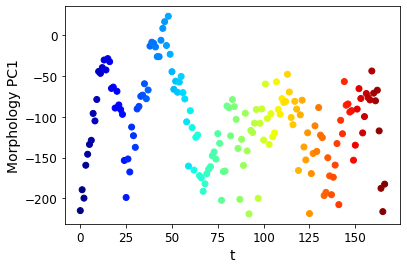

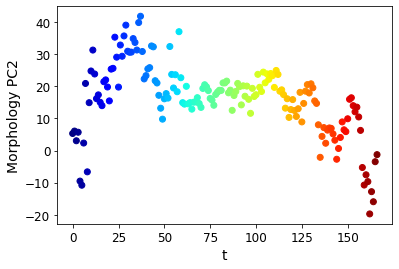

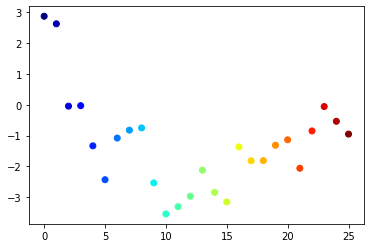

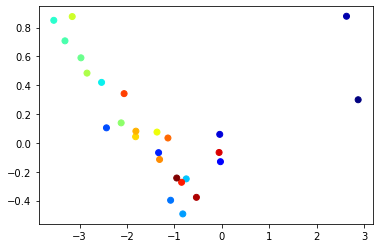

sct_xy1_1073.0
(412, 3)


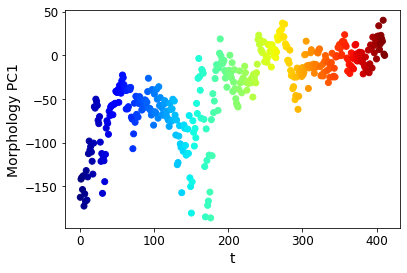

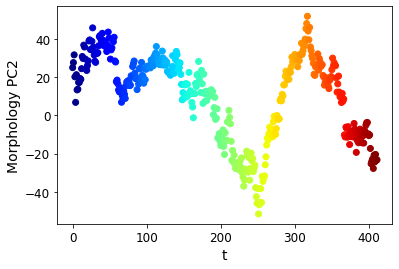

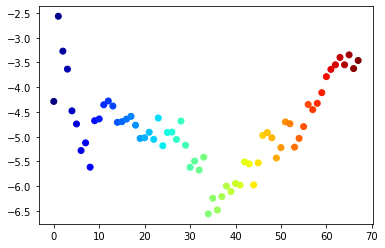

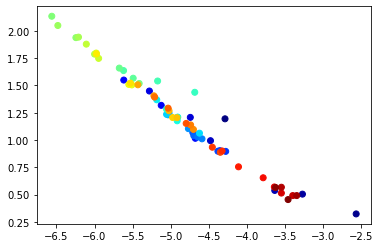

sct_xy1_1084.0
(113, 3)


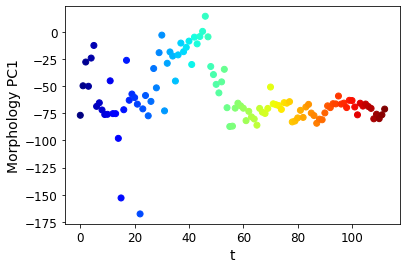

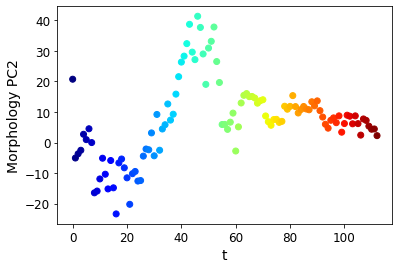

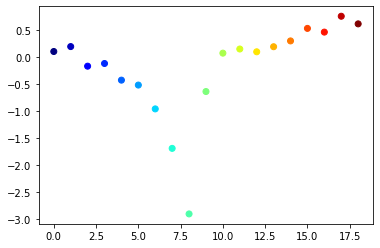

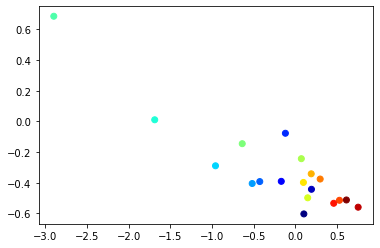

sct_xy1_1133.0
(384, 3)


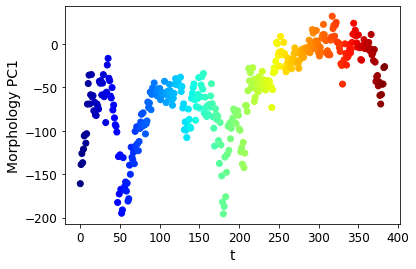

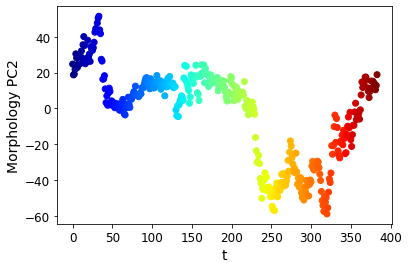

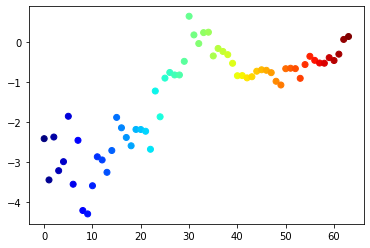

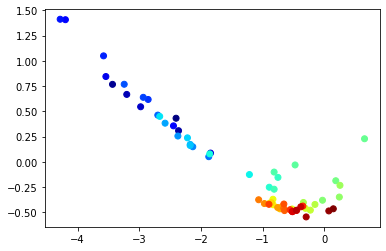

sct_xy1_1164.0
(118, 3)


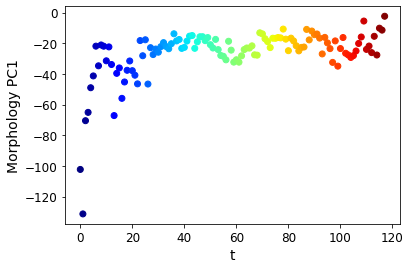

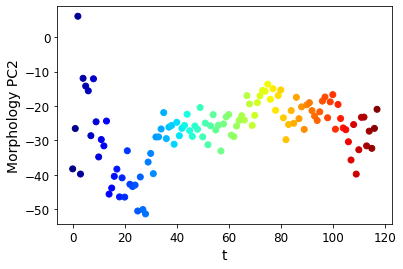

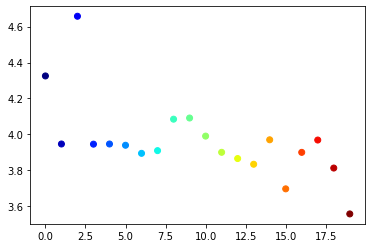

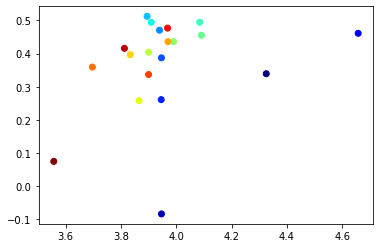

sct_xy1_1170.0
(281, 3)


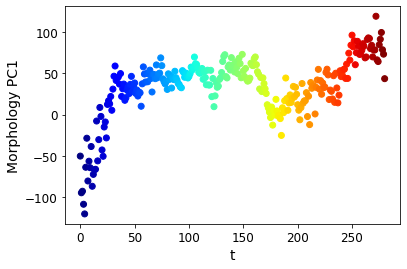

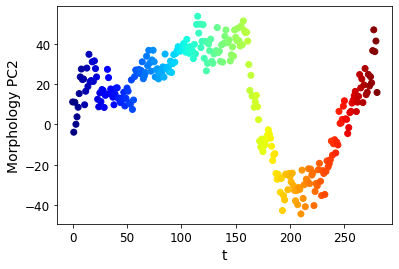

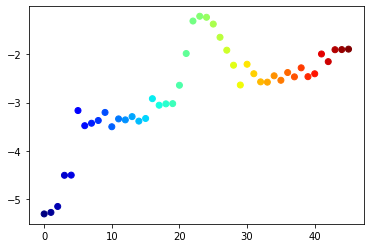

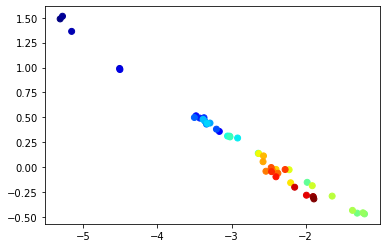

sct_xy1_1171.0
(368, 3)


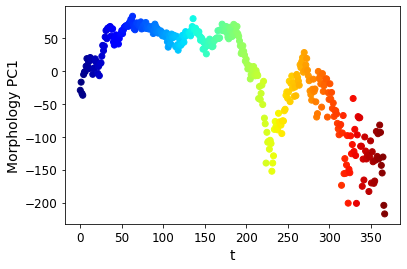

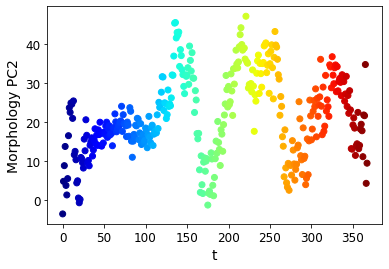

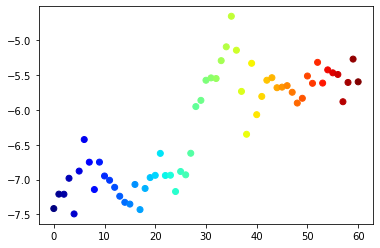

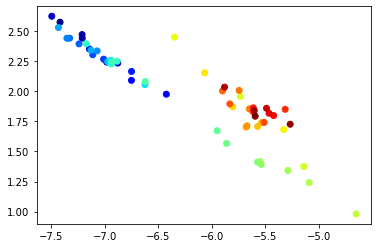

sct_xy1_1187.0
(112, 3)


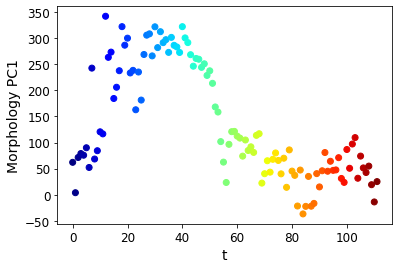

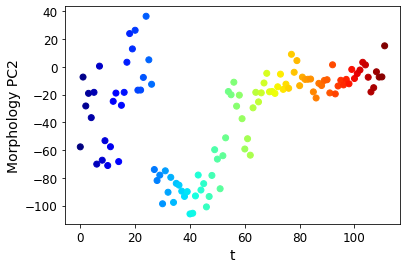

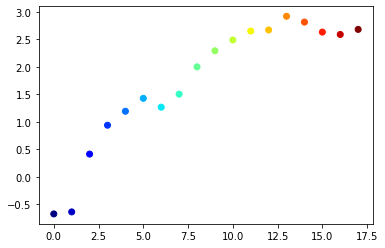

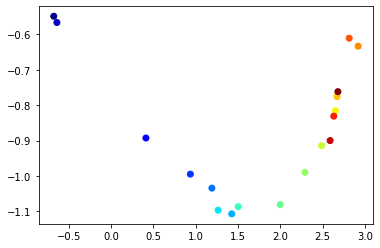

sct_xy1_1193.0
(183, 3)


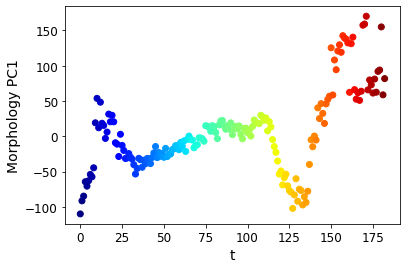

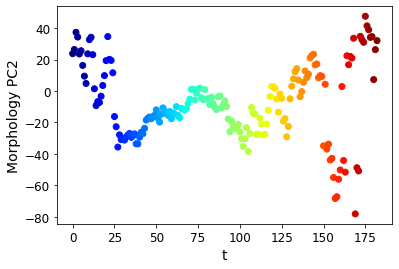

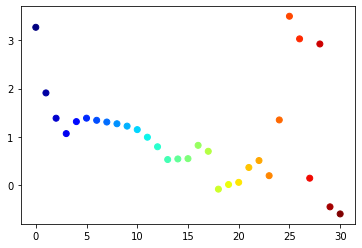

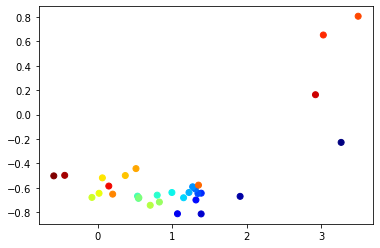

sct_xy1_1194.0
(146, 3)


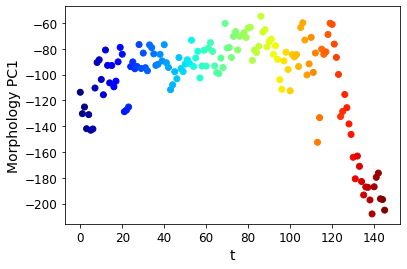

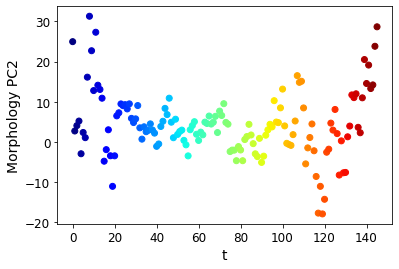

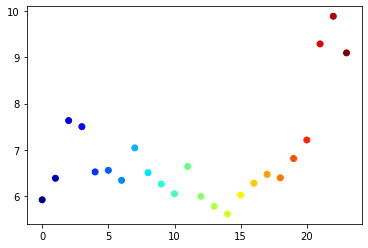

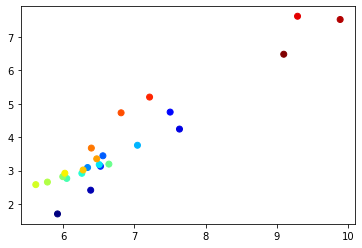

sct_xy1_1237.0
(184, 3)


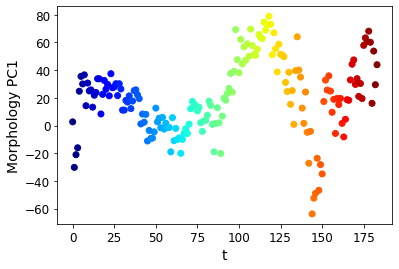

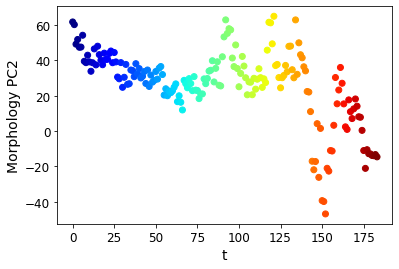

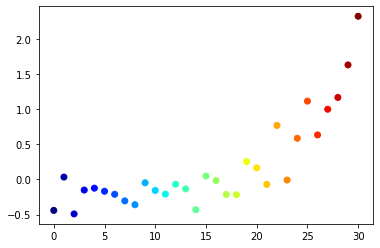

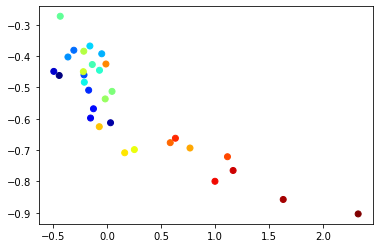

sct_xy1_126.0
(341, 3)


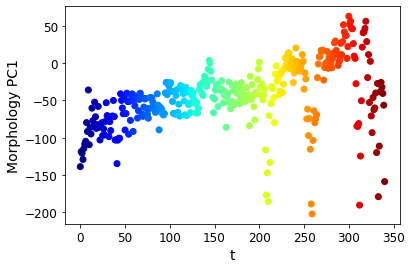

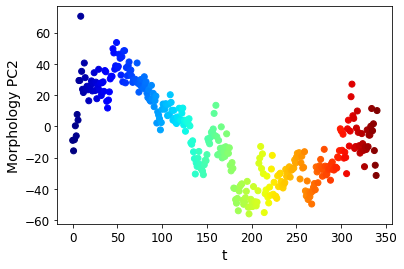

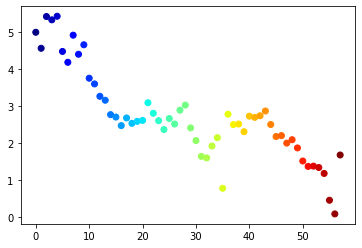

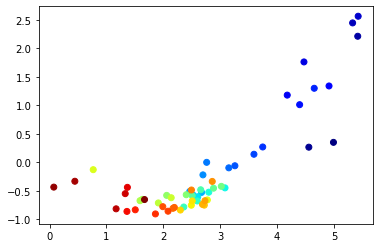

sct_xy1_135.0
(372, 3)


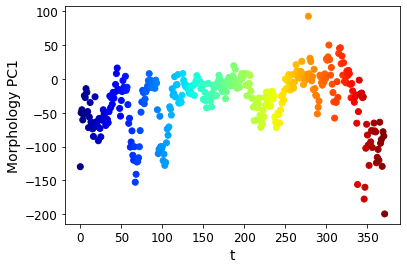

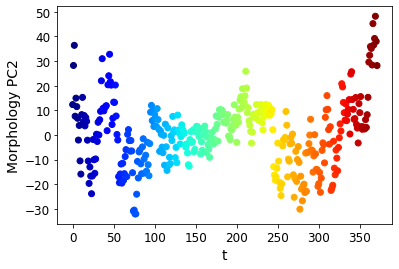

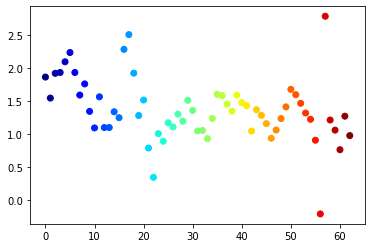

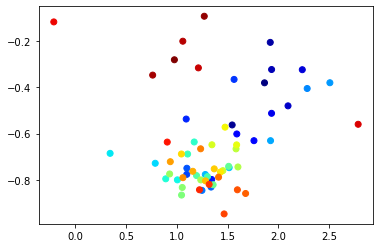

sct_xy1_136.0
(319, 3)


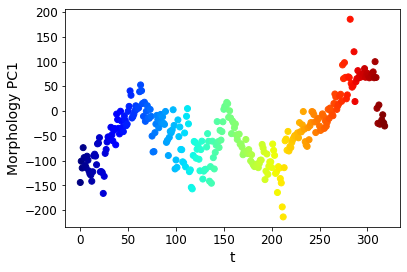

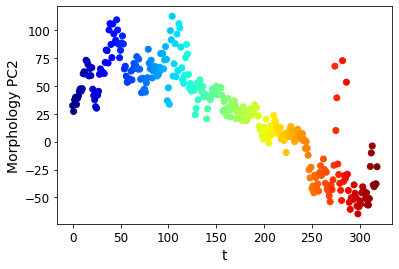

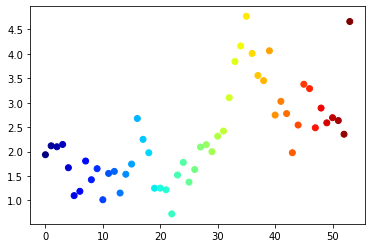

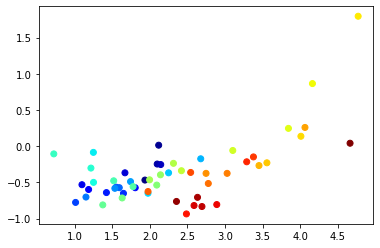

sct_xy1_1386.0
(264, 3)


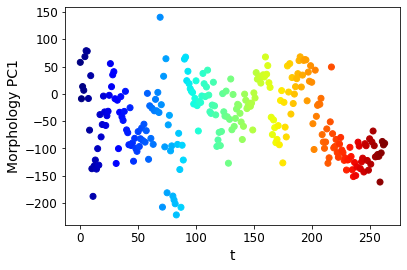

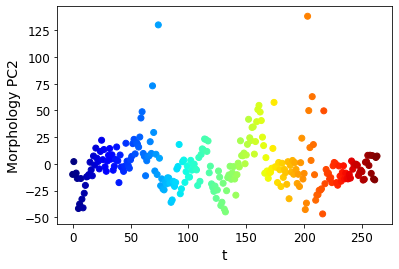

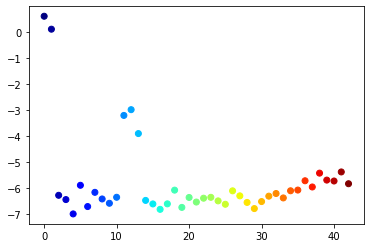

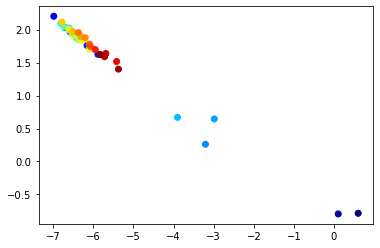

sct_xy1_1389.0
(272, 3)


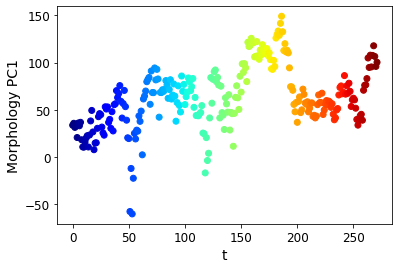

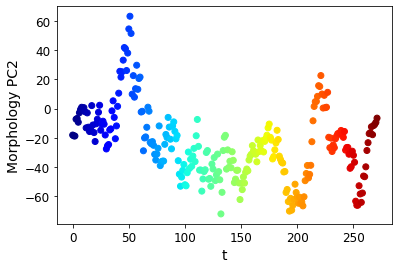

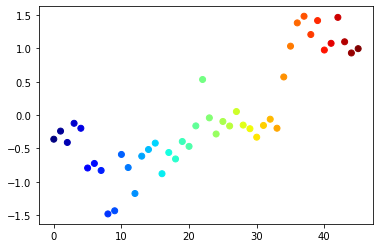

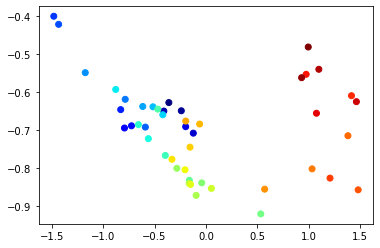

sct_xy1_1431.0
(120, 3)


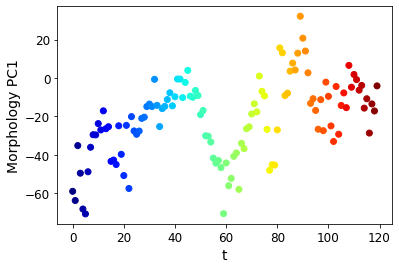

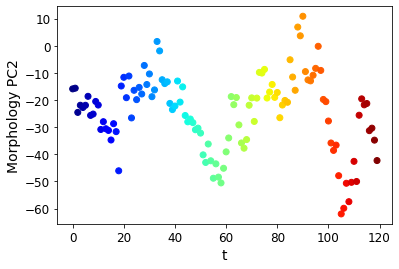

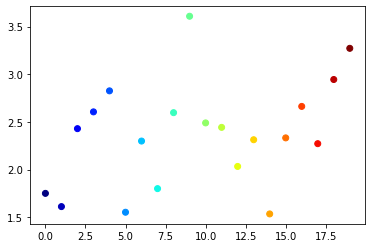

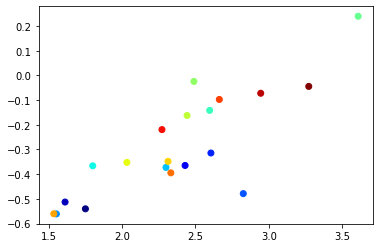

sct_xy1_1432.0
(243, 3)


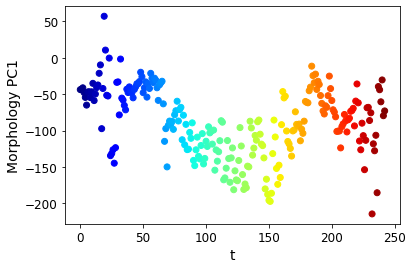

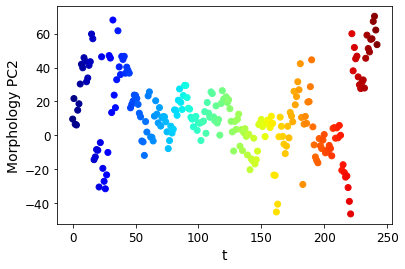

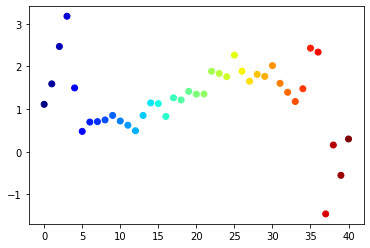

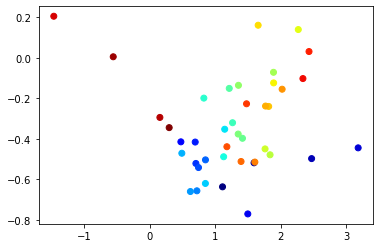

sct_xy1_1487.0
(149, 3)


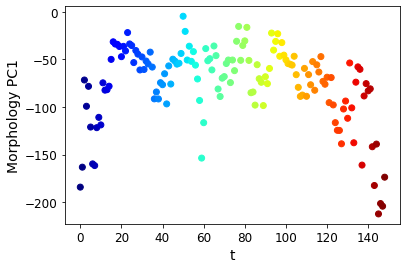

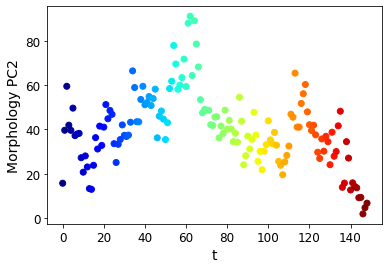

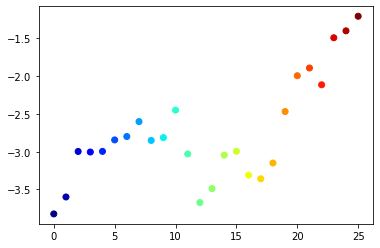

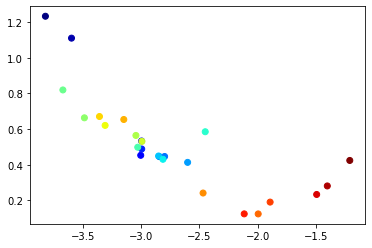

sct_xy1_1489.0
(211, 3)


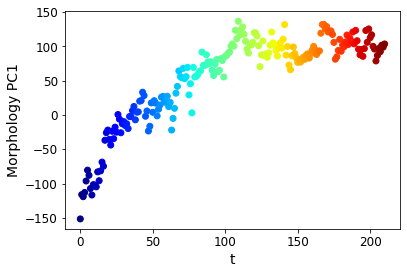

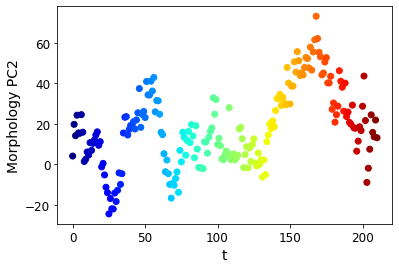

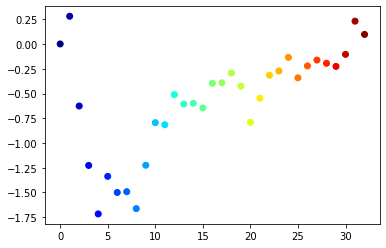

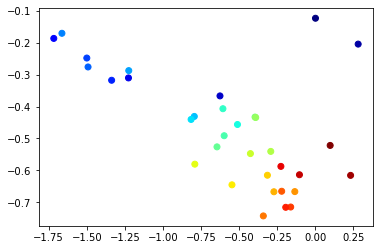

sct_xy1_1490.0
(225, 3)


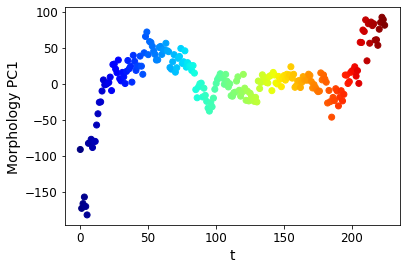

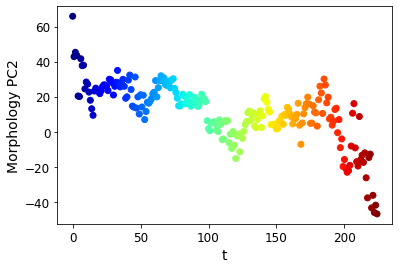

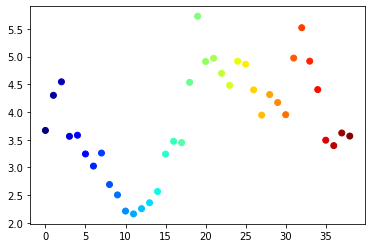

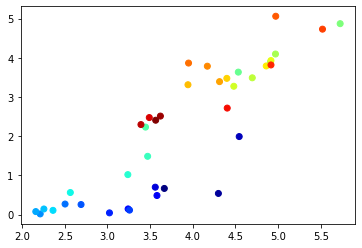

sct_xy1_1511.0
(214, 3)


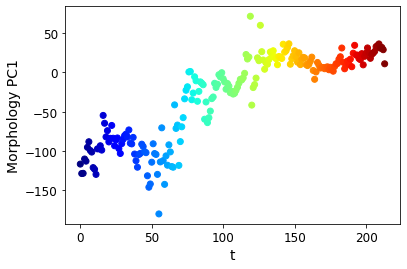

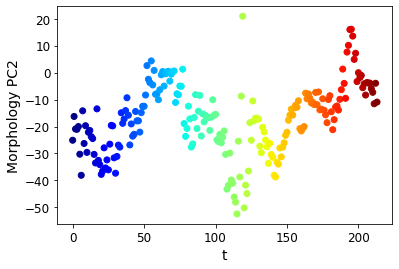

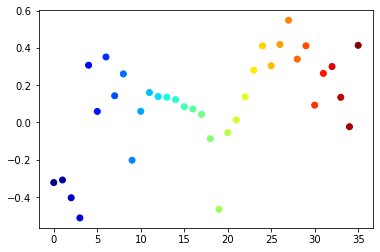

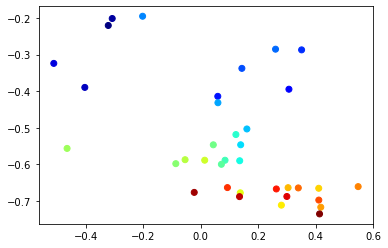

sct_xy1_1529.0
(203, 3)


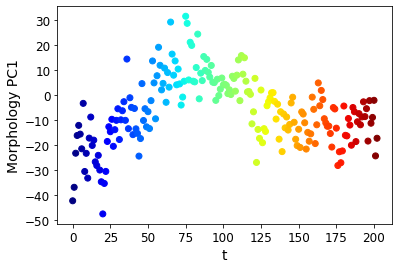

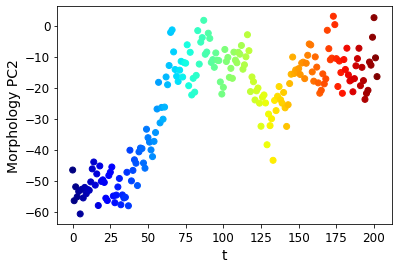

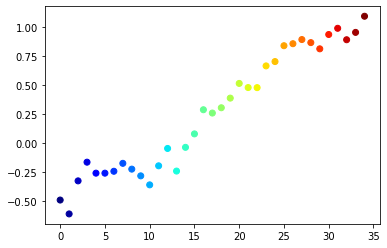

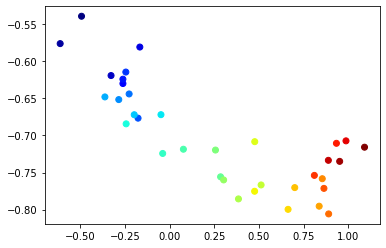

sct_xy1_154.0
(204, 3)


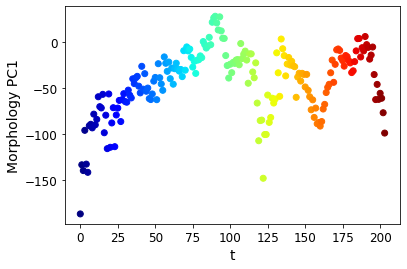

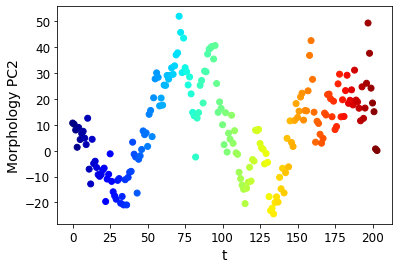

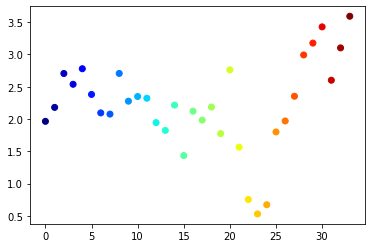

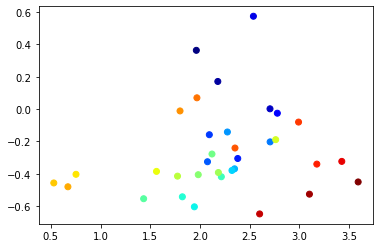

sct_xy1_1556.0
(110, 3)


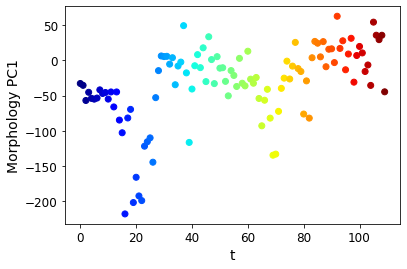

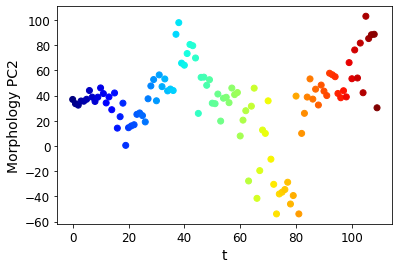

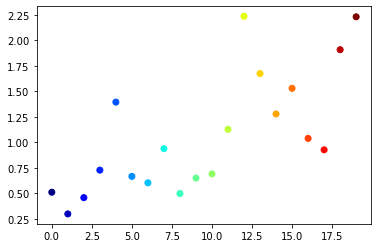

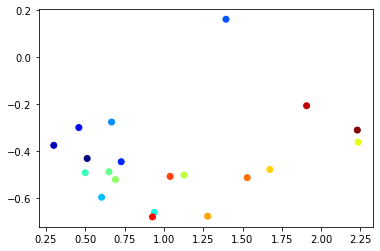

sct_xy1_1557.0
(165, 3)


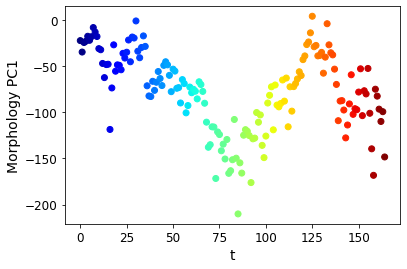

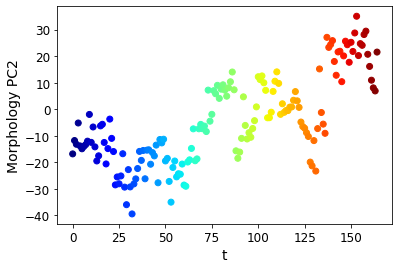

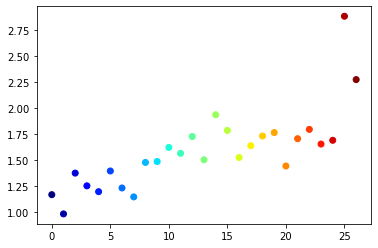

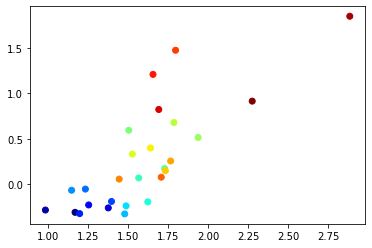

sct_xy1_1592.0
(176, 3)


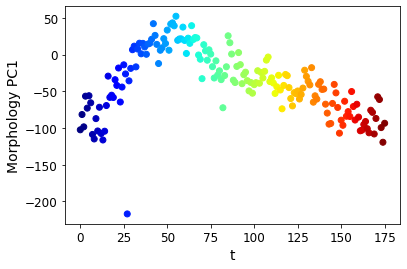

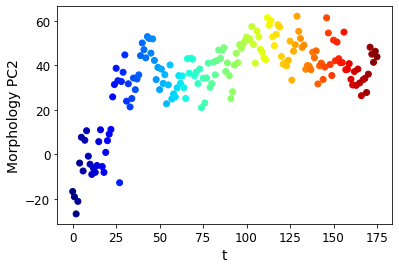

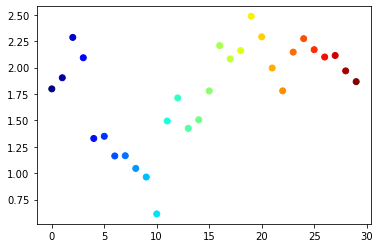

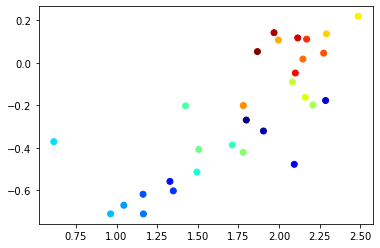

sct_xy1_1605.0
(168, 3)


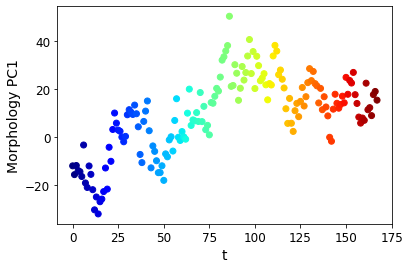

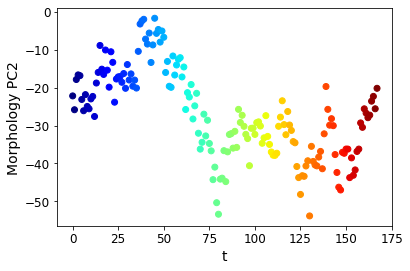

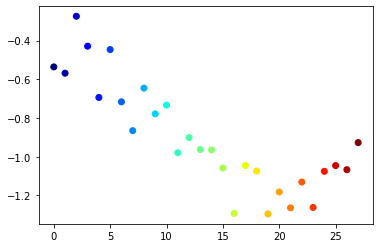

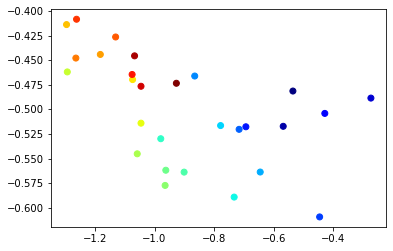

sct_xy1_1706.0
(88, 3)


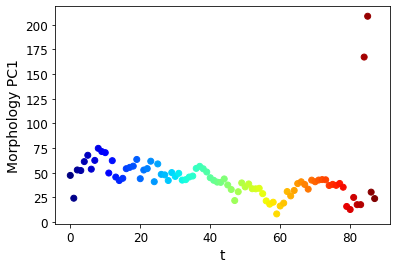

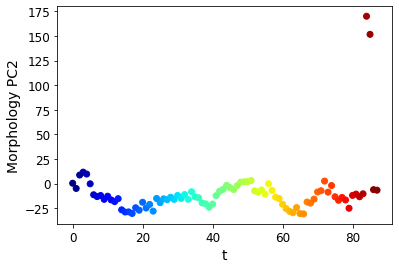

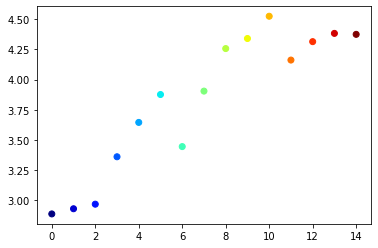

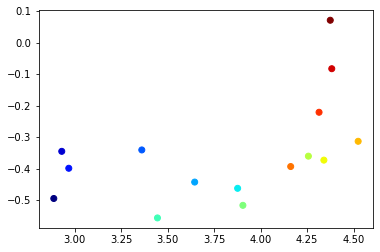

sct_xy1_175.0
(363, 3)


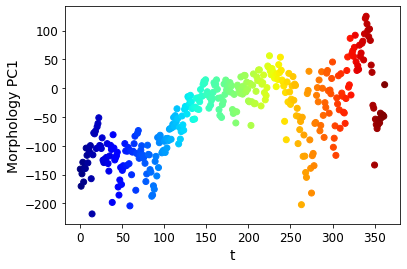

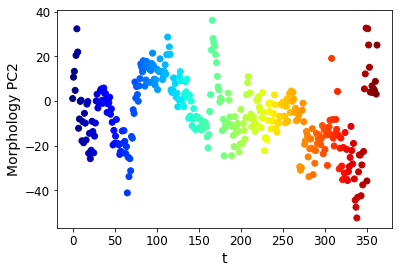

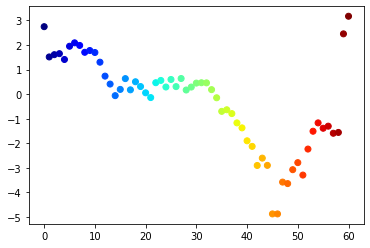

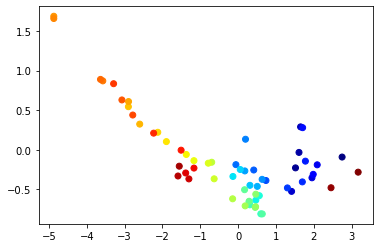

sct_xy1_199.0
(639, 3)


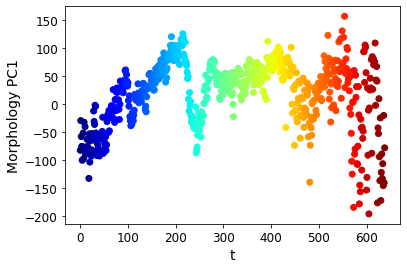

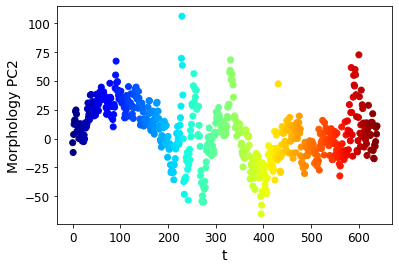

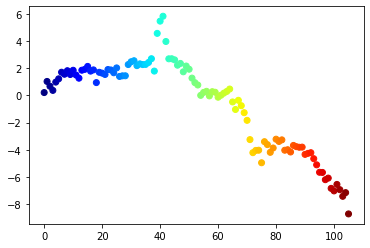

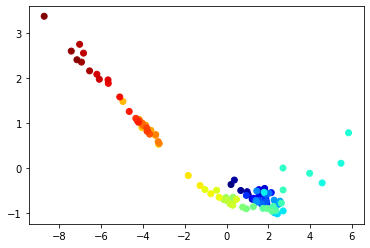

sct_xy1_250.0
(132, 3)


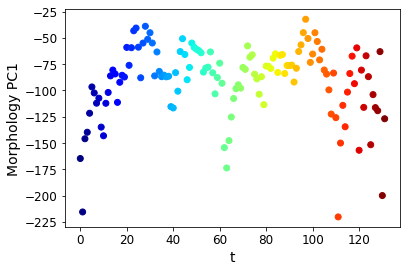

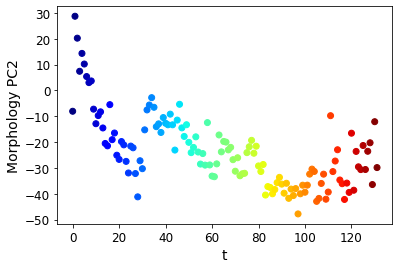

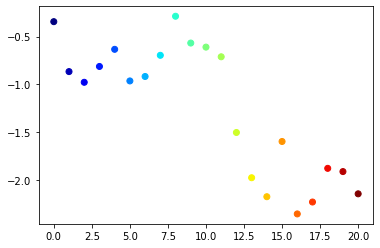

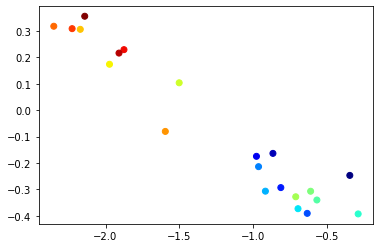

sct_xy1_281.0
(83, 3)


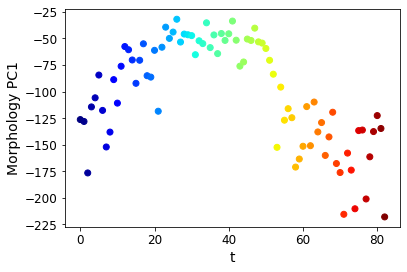

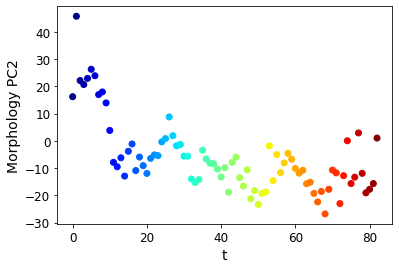

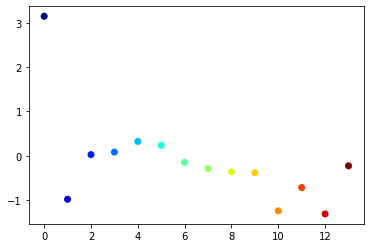

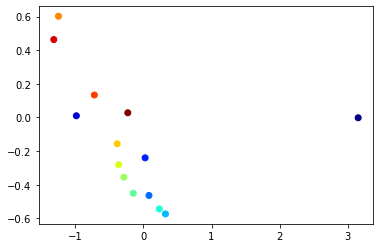

sct_xy1_290.0
(479, 3)


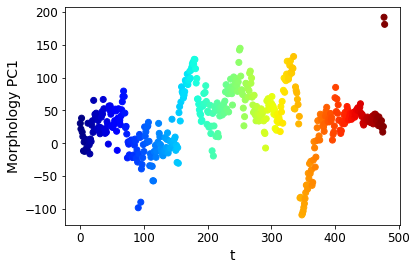

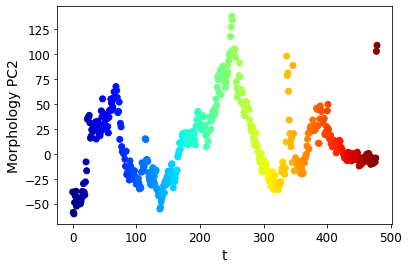

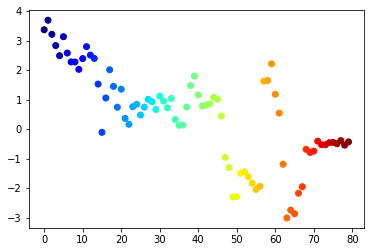

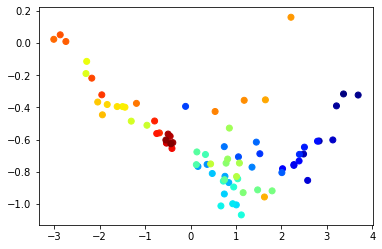

sct_xy1_291.0
(115, 3)


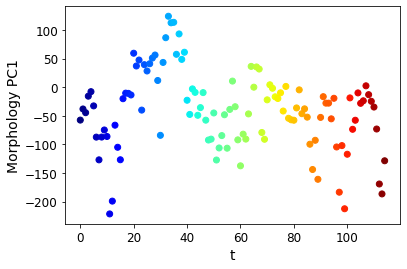

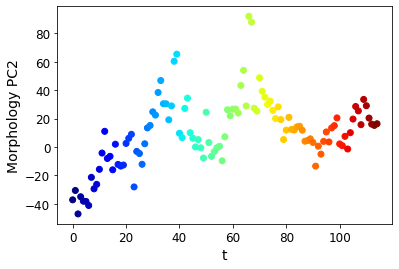

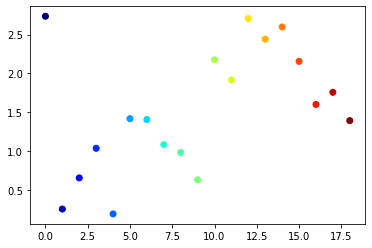

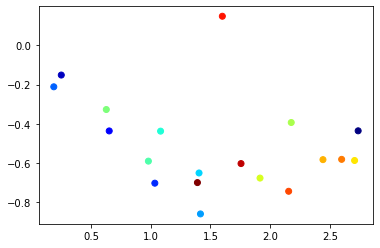

sct_xy1_298.0
(189, 3)


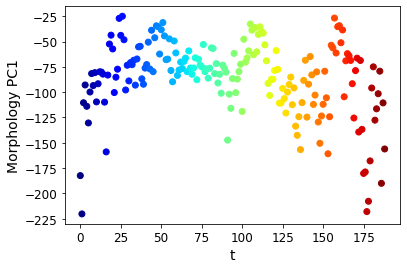

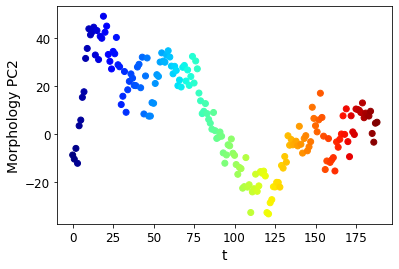

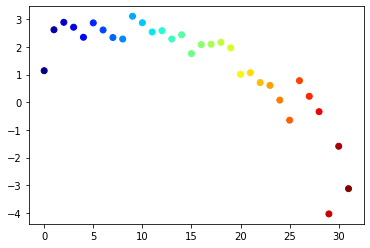

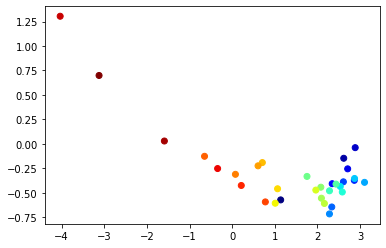

sct_xy1_377.0
(701, 3)


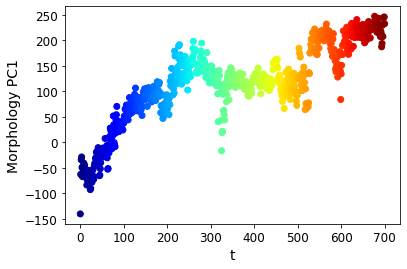

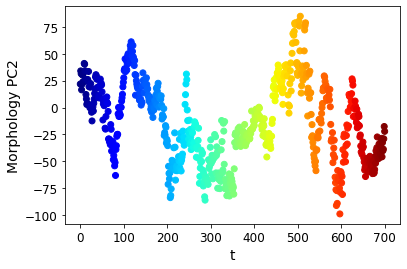

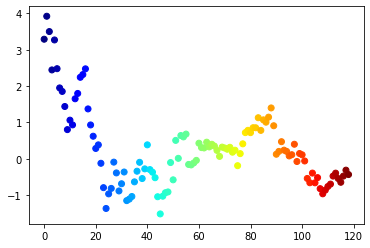

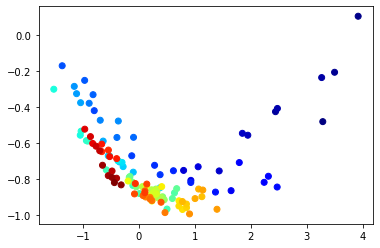

sct_xy1_378.0
(315, 3)


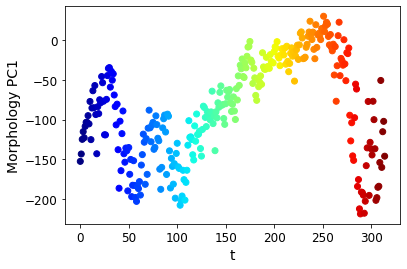

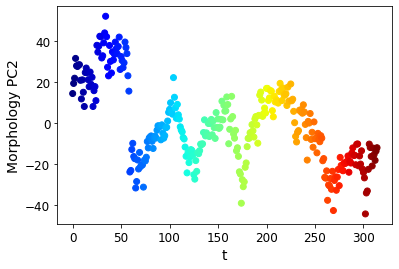

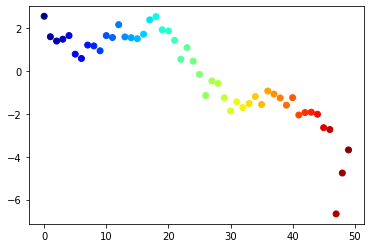

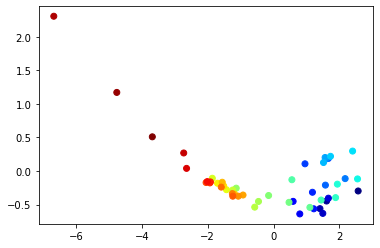

sct_xy1_379.0
(179, 3)


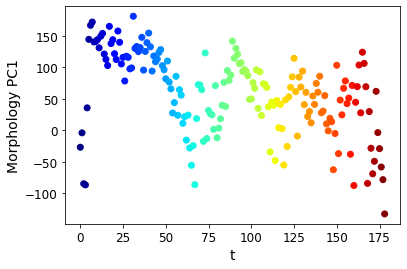

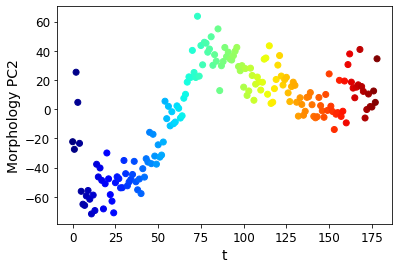

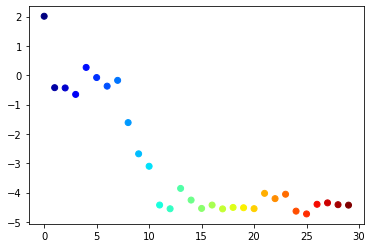

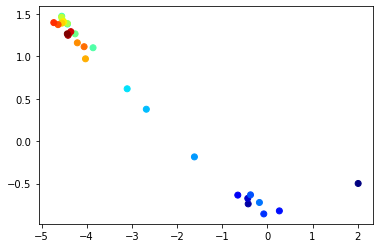

sct_xy1_386.0
(638, 3)


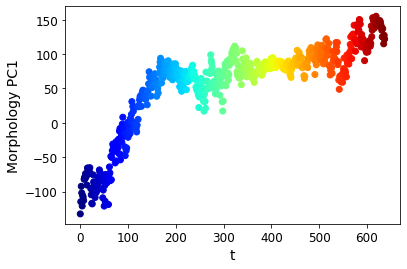

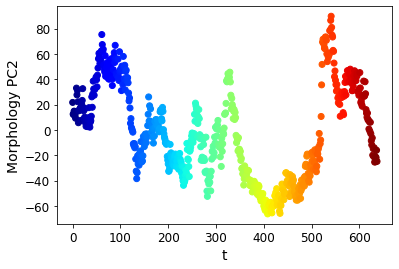

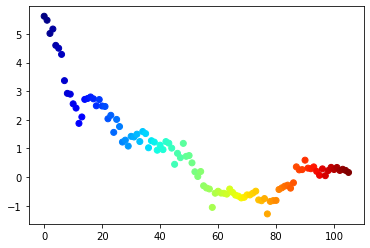

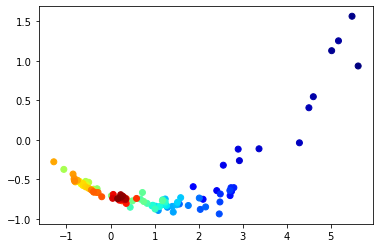

sct_xy1_397.0
(696, 3)


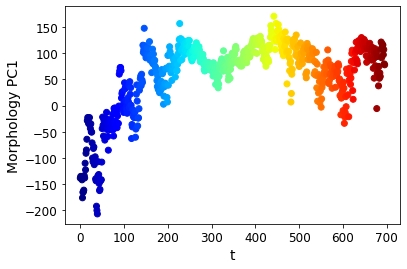

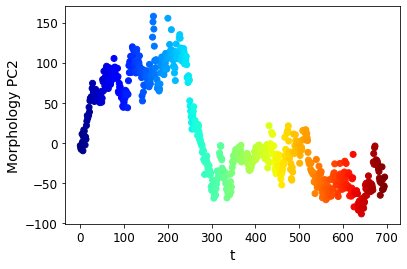

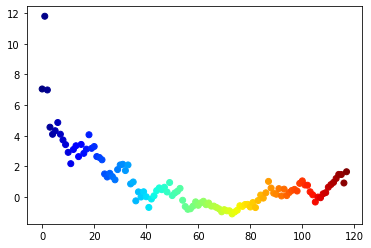

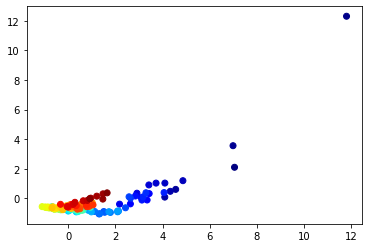

sct_xy1_421.0
(82, 3)


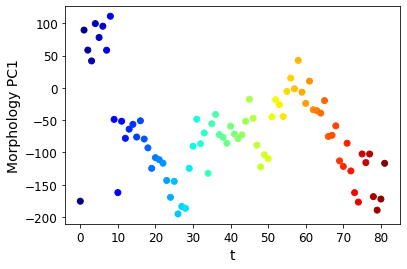

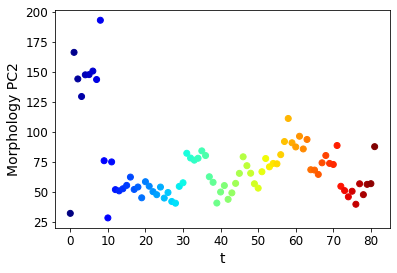

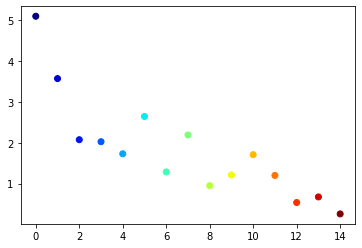

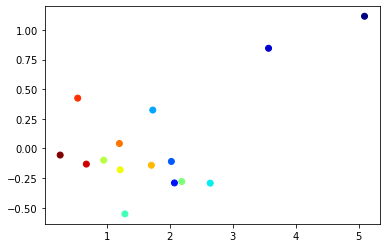

sct_xy1_468.0
(95, 3)


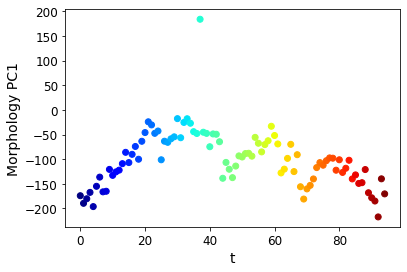

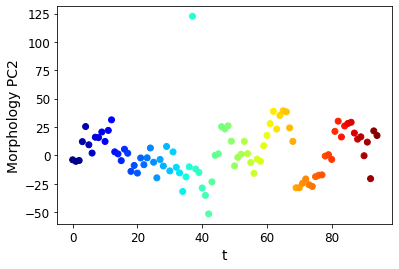

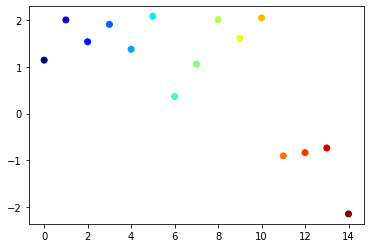

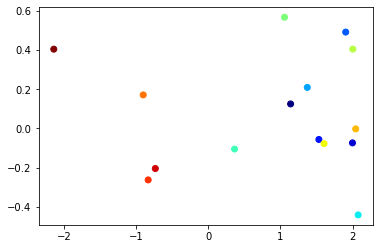

sct_xy1_469.0
(90, 3)


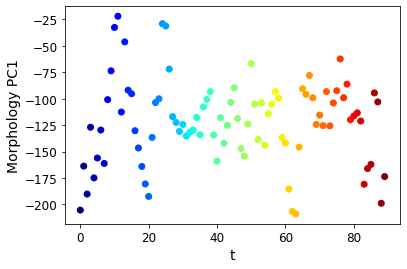

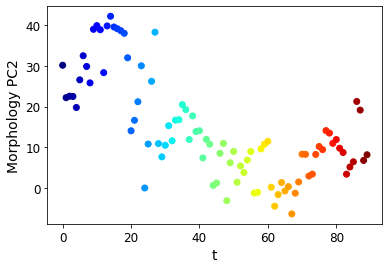

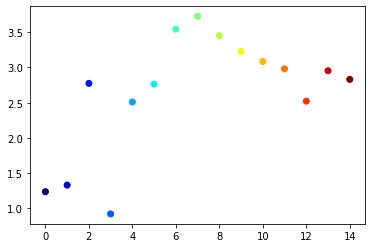

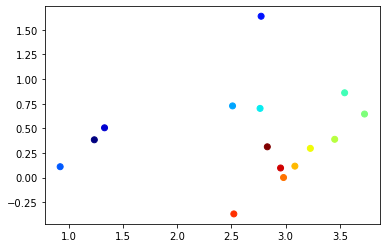

sct_xy1_472.0
(95, 3)


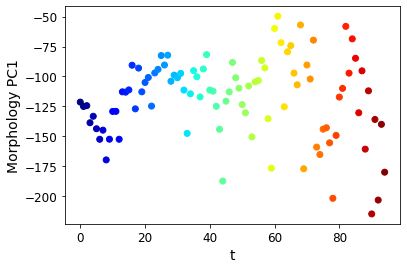

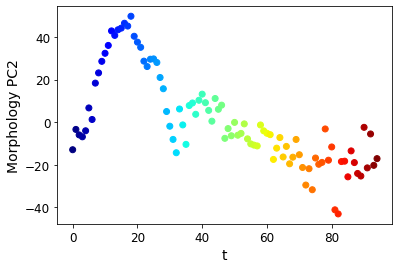

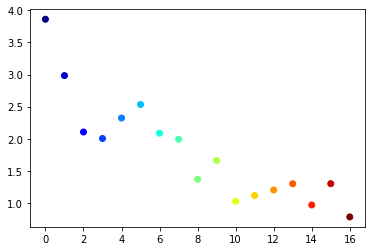

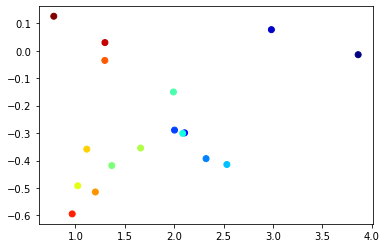

sct_xy1_485.0
(652, 3)


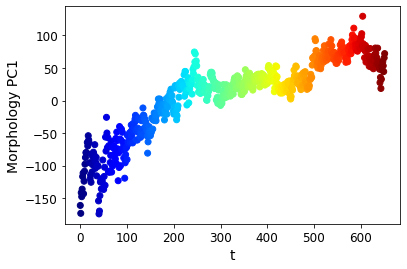

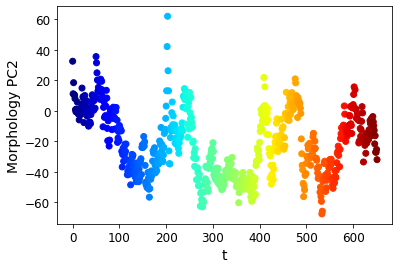

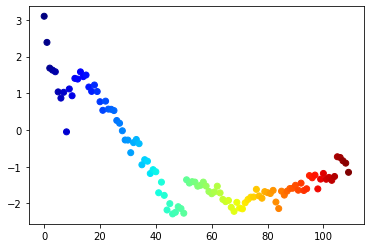

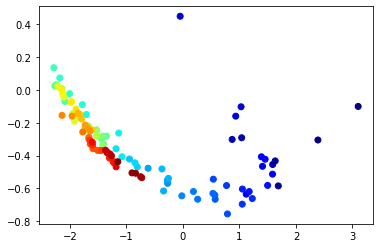

sct_xy1_518.0
(620, 3)


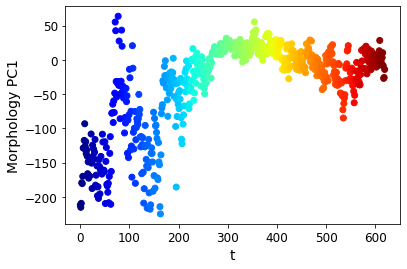

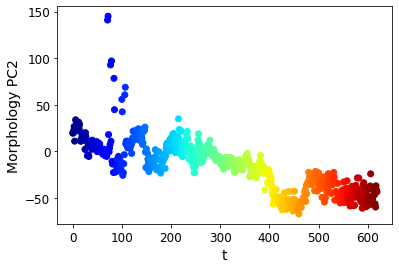

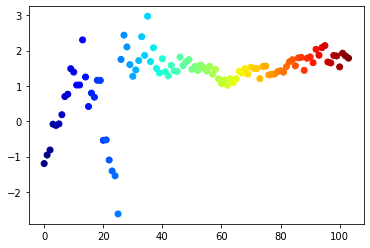

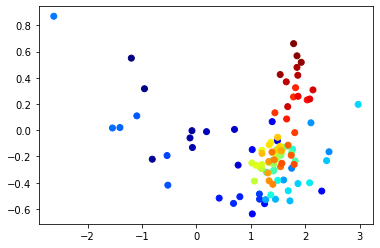

sct_xy1_520.0
(88, 3)


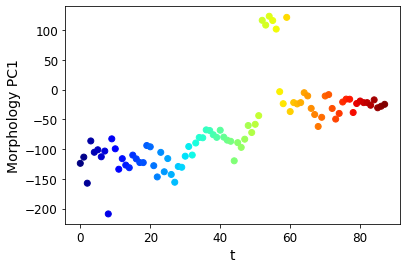

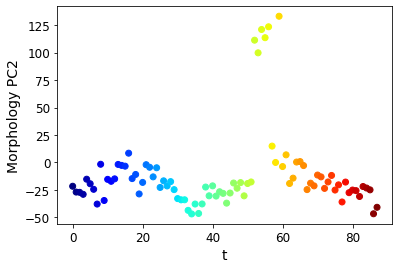

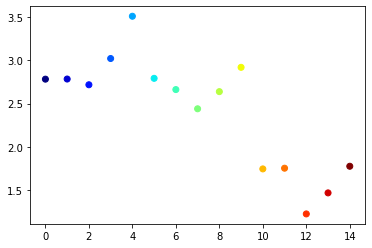

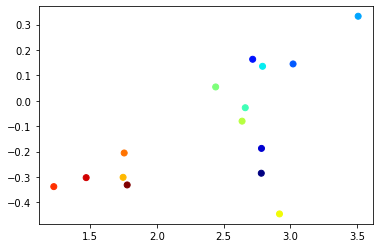

sct_xy1_564.0
(112, 3)


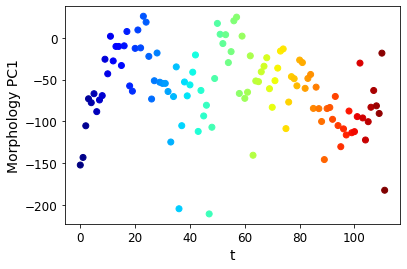

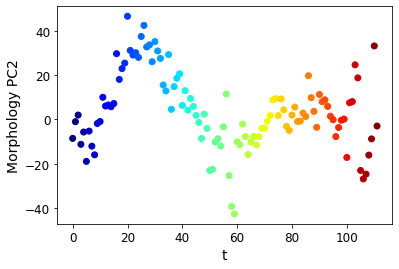

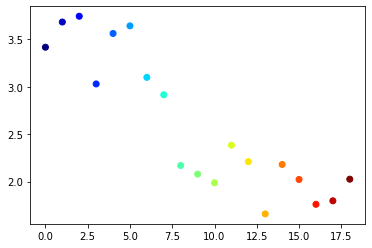

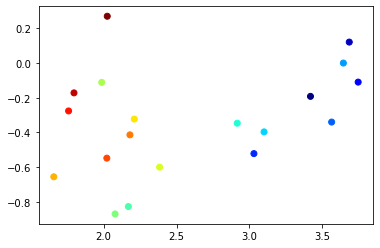

sct_xy1_648.0
(552, 3)


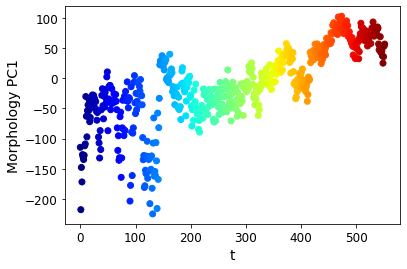

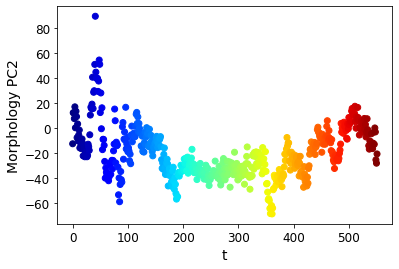

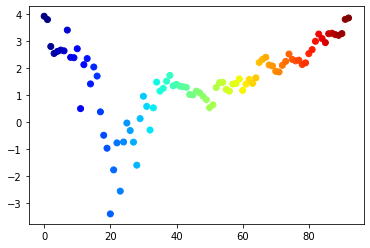

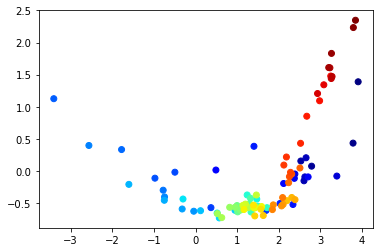

sct_xy1_729.0
(304, 3)


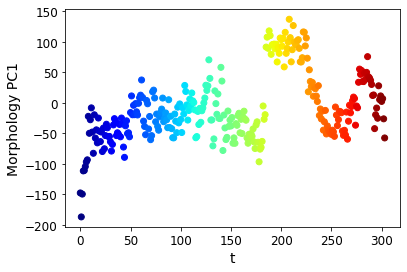

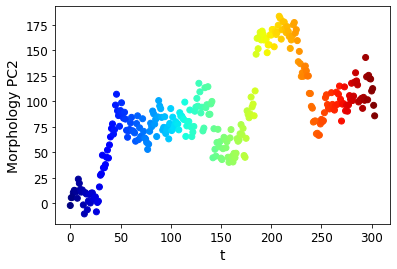

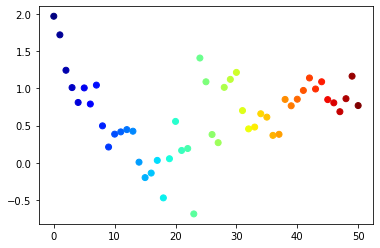

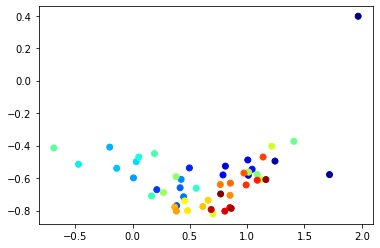

sct_xy1_777.0
(164, 3)


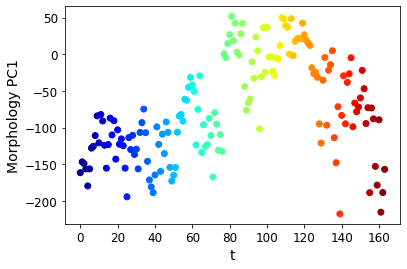

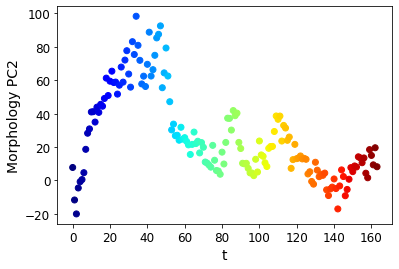

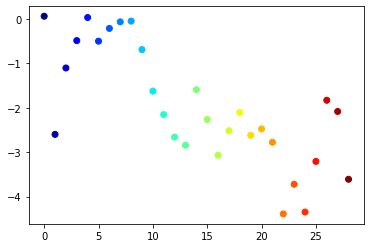

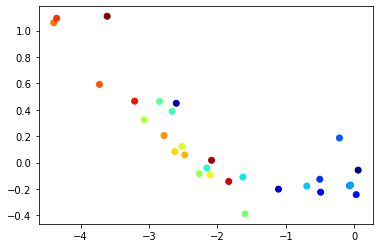

sct_xy1_804.0
(283, 3)


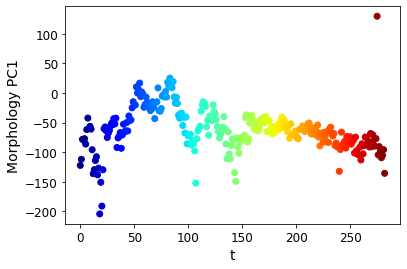

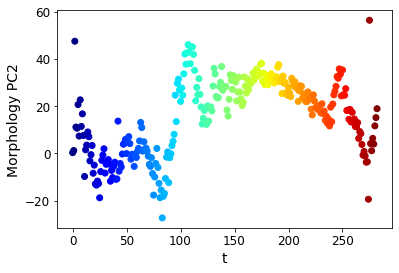

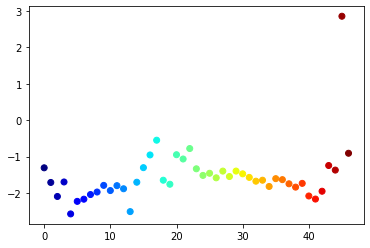

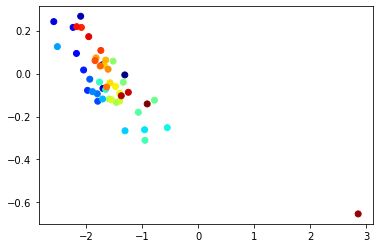

sct_xy1_807.0
(489, 3)


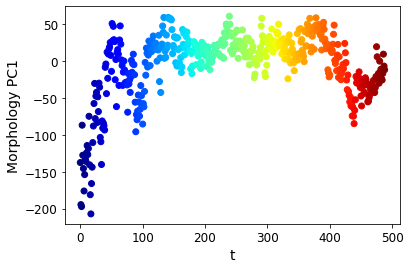

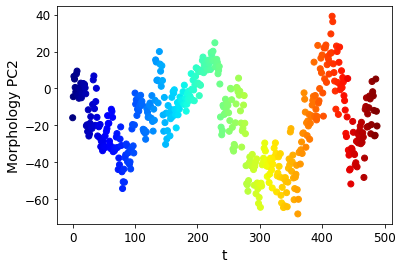

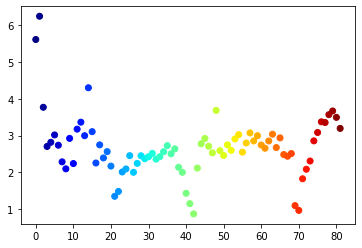

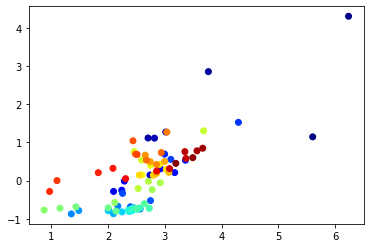

sct_xy1_854.0
(487, 3)


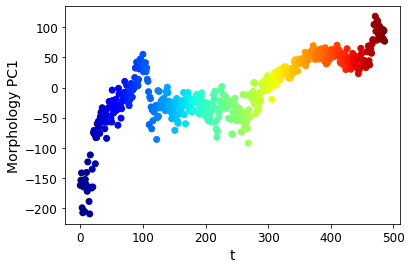

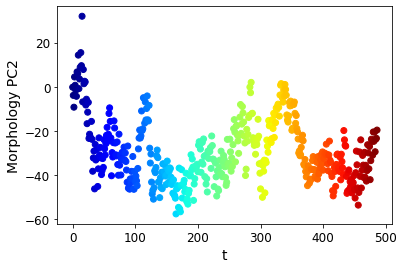

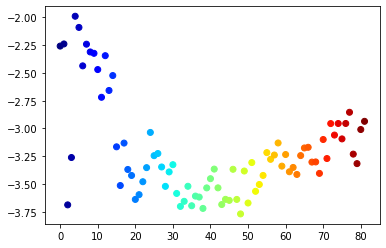

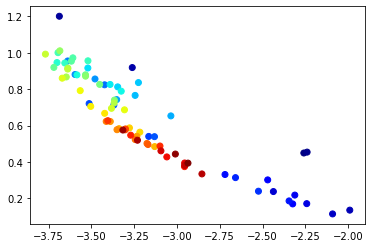

sct_xy1_860.0
(117, 3)


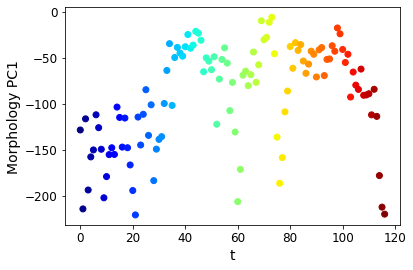

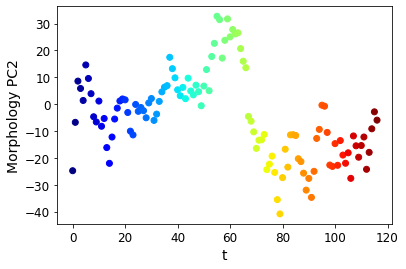

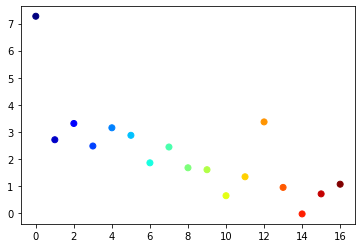

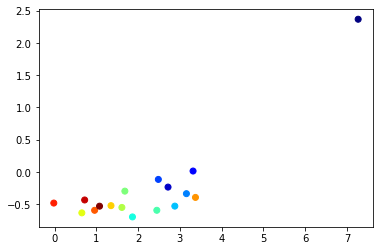

sct_xy1_939.0
(284, 3)


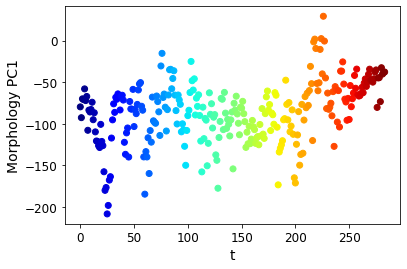

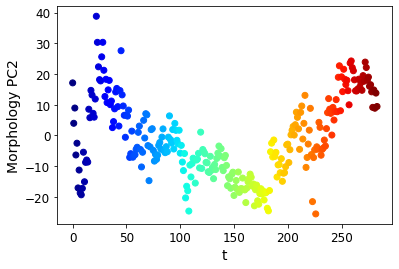

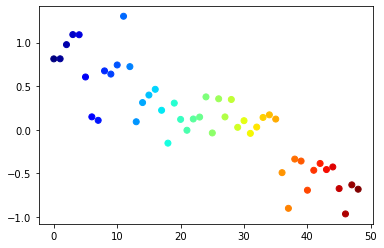

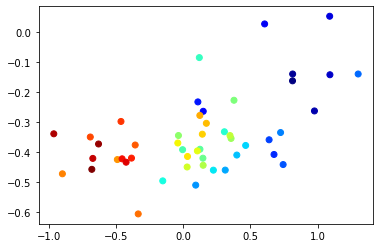

sct_xy1_963.0
(109, 3)


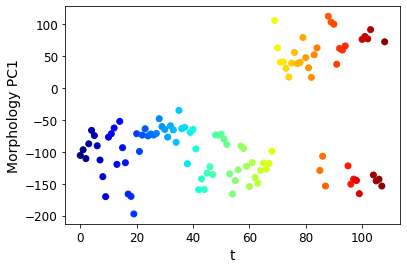

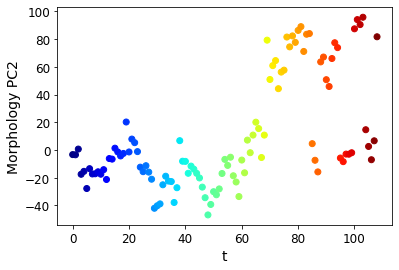

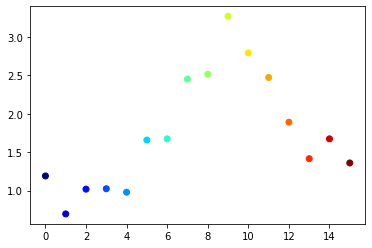

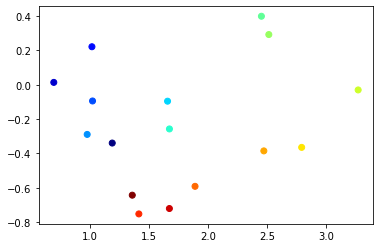

sct_xy1_965.0
(198, 3)


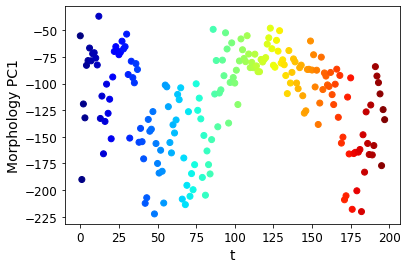

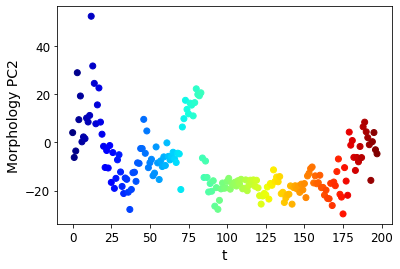

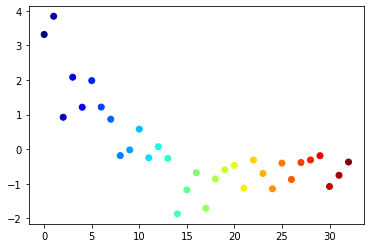

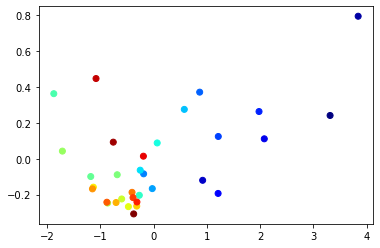

sct_xy1_975.0
(253, 3)


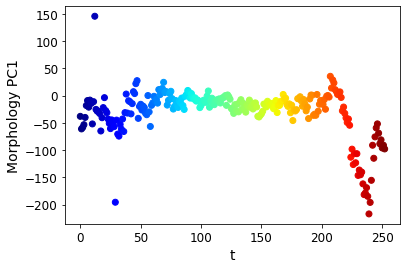

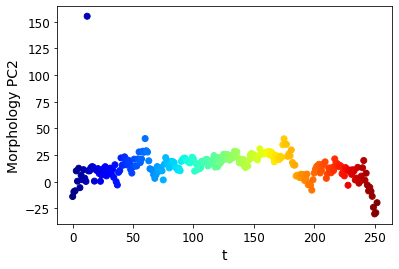

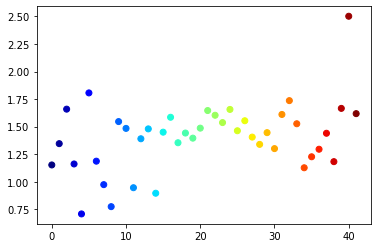

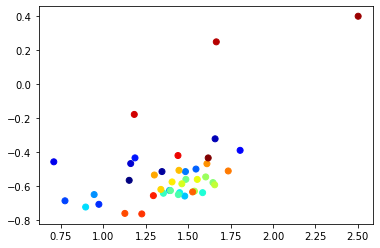

sct_xy1_985.0
(250, 3)


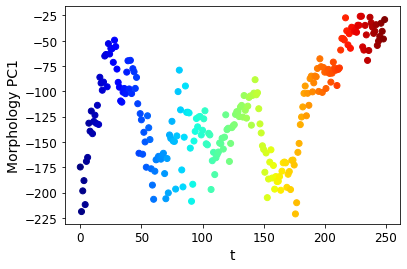

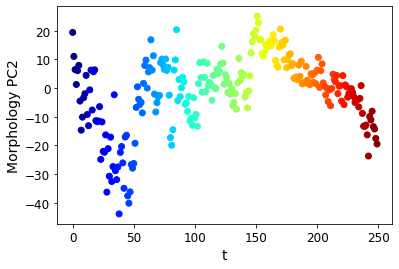

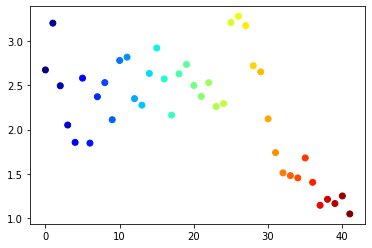

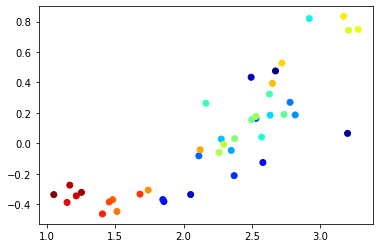

In [5]:
ict_list=sorted(listdir(ict_path))
print(len(ict_list))
for i in range(len(ict_list)):
    with open (ict_path+ict_list[i], 'rb') as fp:            
        ict = pickle.load(fp,encoding='iso-8859-1')
    print(ict_list[i])
    print(ict.traj_cord.shape)
#     print(ict.traj_seri)
#     print(dir(ict))
#     print(ict.traj_vimentin_feature_values[0])
#     mask=ict.traj_pcna_feature_values[0]>0
# #     print(mask)
#     plt.plot(ict.traj_pcna_feature_values[0][mask])
# #     plt.ylim([np.amin(ict.traj_pcna_feature_values[0][mask]),np.amax(ict.traj_pcna_feature_values[0][mask])])
#     plt.show()
    
#     plt.plot(ict.traj_pcna_feature_values[2][mask])
# #     plt.ylim([np.amin(ict.traj_pcna_feature_values[2][mask]),np.amax(ict.traj_pcna_feature_values[2][mask])])
#     plt.show()
    

#     pcna_mask=ict.traj_pcna_feature_values[0]>0
    
    
#     dot_color=np.arange(ict.traj_cord[pcna_mask].shape[0])
#     cm=plt.cm.get_cmap('jet')
#     plt.scatter(ict.traj_cord[:,0][pcna_mask],ict.traj_pcna_haralick_pca_cord[:,1][pcna_mask],c=dot_color,cmap=cm)
#     plt.show()
    
    
    dot_color=np.arange(ict.traj_cord.shape[0])
    cm=plt.cm.get_cmap('jet')
    plt.scatter(np.arange(ict.traj_cord[:,0].shape[0]),ict.traj_cord[:,0],c=dot_color,cmap=cm)
    plt.ylabel('Morphology PC1',fontsize=14)
    plt.xlabel('t',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    plt.scatter(np.arange(ict.traj_cord[:,0].shape[0]),ict.traj_cord[:,1],c=dot_color,cmap=cm)
    plt.ylabel('Morphology PC2',fontsize=14)
    plt.xlabel('t',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    plt.show()
    
    vim_mask=ict.traj_vimentin_feature_values[0]>0
    dot_color=np.arange(ict.traj_vimentin_haralick_pca_cord[vim_mask].shape[0])
    cm=plt.cm.get_cmap('jet')
    plt.scatter(np.arange(ict.traj_vimentin_haralick_pca_cord[:,0][vim_mask].shape[0]),ict.traj_vimentin_haralick_pca_cord[:,0][vim_mask],c=dot_color,cmap=cm)
    plt.show()
    plt.scatter(ict.traj_vimentin_haralick_pca_cord[:,0][vim_mask],ict.traj_vimentin_haralick_pca_cord[:,1][vim_mask],c=dot_color,cmap=cm)
    plt.show()
    